## ViewCube survey analysis - Video vs Live  
67 participants (August, 5th 2024).

In [1]:
import pandas as pd
import numpy as np
import math
import csv

%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.patches import Rectangle

In [2]:
import astropy
from astropy import stats

In [3]:
data = pd.read_csv("ViewCube_survey-2.csv", delimiter=';')
data.fillna("x-x", inplace=True)
data

,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
0,0,x-x,x-x,x-x,RES_ESP,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x
1,0,x-x,x-x,x-x,RES_ENG,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x
2,1,1.0,4/18/24 10:01:49,4/18/24 10:26:12,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Ninguna,Blues,31-40,No,España,Español,"Sí, utilicé auriculares.",Audio 3D / Gaming;,Gran trabajo!
3,2,2.0,4/18/24 14:48:33,4/18/24 15:19:46,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Algo de experiencia (hobby/entusiasta),Algo de experiencia (hobby/entusiasta),Rock,21-30,No,ESPAÑA,ESPAÑOL,"Sí, utilicé auriculares.",Intra-aurales;,x-x
4,3,3.0,4/18/24 17:14:38,4/18/24 17:21:38,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 1,Espectro 3,...,Algo de experiencia (hobby/entusiasta),Muy básica,Clasica,Prefiero no decirlo,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,63,18.0,7/25/24 1:49:37,7/25/24 3:03:34,anonymous,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,No experienced,Very experienced (professional),"spatial electroacoustic music, music concrete,...",Prefer not to say,No,Australia,Elnglish,"Yes, I used headphones",Circum-aural;,discriminating between constant tone and rever...
65,64,19.0,7/29/24 10:32:28,7/29/24 10:50:09,anonymous,Sonification 2,Left,Sonification 2,Sonification 3,Spectrum 2,...,No experienced,Some experienced (hobby/enthusiast),Pop music,21-30,No,Spain,Catalan,"Yes, I used headphones",Stereo;,x-x
66,65,3.0,4/15/24 9:17:06,4/15/24 9:51:59,anonymous,Sonification 1,Left,Sonification 3,Sonification 3,Spectrum 2,...,Very experienced (professional),Very basic experience,"Clasic, Rock",41-50,Yes,Spain,Spanish,"Yes, I used headphones",x-x,No queda claro si lo que distingue una regi´òn...
67,66,1.0,5/13/24 11:17:19,5/13/24 11:33:10,anonymous,Sonification 2,Left,Sonification 2,Sonification 2,Spectrum 2,...,Very experienced (professional),Experienced (amateur),Electronic,31-40,No,United Kingdom,English,"Yes, I used headphones",Stereo;,x-x


In [4]:
data_total_responses = len(data)-2
print("Total responses:", data_total_responses)

Total responses: 67


In [5]:
def percentage (participants):
    y = (participants/data_total_responses)*100
    return(y)

In [6]:
def percentage_sub (participants, subgroup_responses):
    z = (participants/subgroup_responses)*100
    return(z)

In [7]:
def percentage_V (participants):
    y = (participants/video_responses)*100
    return(y)

In [8]:
def percentage_L (participants):
    y = (participants/live_responses)*100
    return(y)

# Global results-Video vs Live

### 12 Simple questions -VIDEO

In [9]:
video_responses = len([i for i in range(len(data)) if ("XXX" in data.Q15[i])])
Q1G = len([i for i in range(len(data)) if (((data.Q1[i] == data.Q1[0]) or (data.Q1[i] == data.Q1[1])) and ("XXX" in data.Q15[i]))])-2
Q2G = len([i for i in range(len(data)) if (((data.Q2[i] == data.Q2[0]) or (data.Q2[i] == data.Q2[1])) and ("XXX" in data.Q15[i]))])-2
Q3G = len([i for i in range(len(data)) if (((data.Q3[i] == data.Q3[0]) or (data.Q3[i] == data.Q3[1])) and ("XXX" in data.Q15[i]))])-2
Q4G = len([i for i in range(len(data)) if (((data.Q4[i] == data.Q4[0]) or (data.Q4[i] == data.Q4[1])) and ("XXX" in data.Q15[i]))])-2
Q5G = len([i for i in range(len(data)) if (((data.Q5[i] == data.Q5[0]) or (data.Q5[i] == data.Q5[1])) and ("XXX" in data.Q15[i]))])-2
Q6G = len([i for i in range(len(data)) if (((data.Q6[i] == data.Q6[0]) or (data.Q6[i] == data.Q6[1])) and ("XXX" in data.Q15[i]))])-2
Q7G = len([i for i in range(len(data)) if (((data.Q7[i] == data.Q7[0]) or (data.Q7[i] == data.Q7[1])) and ("XXX" in data.Q15[i]))])-2
Q8G = len([i for i in range(len(data)) if (((data.Q8[i] == data.Q8[0]) or (data.Q8[i] == data.Q8[1])) and ("XXX" in data.Q15[i]))])-2
Q9G = len([i for i in range(len(data)) if (((data.Q9[i] == data.Q9[0]) or (data.Q9[i] == data.Q9[1])) and ("XXX" in data.Q15[i]))])-2
Q10G = len([i for i in range(len(data)) if (((data.Q10[i] == data.Q10[0]) or (data.Q10[i] == data.Q10[1])) and ("XXX" in data.Q15[i]))])-2
Q11G = len([i for i in range(len(data)) if (((data.Q11[i] == data.Q11[0]) or (data.Q11[i] == data.Q11[1])) and ("XXX" in data.Q15[i]))])-2
Q12G = len([i for i in range(len(data)) if (((data.Q12[i] == data.Q12[0]) or (data.Q12[i] == data.Q12[1])) and ("XXX" in data.Q15[i]))])-2

data_correct_V = [Q1G,Q2G,Q3G,Q4G,Q5G,Q6G,Q7G,Q8G,Q9G,Q10G,Q11G,Q12G]
data_correct_V = np.array(data_correct_V, int)
data_correct_V #12 Single response correct results

array([ 8, 20, 10,  7, 14, 14, 11, 14, 10,  4,  9, 10])

In [10]:
mean_data_correct_V = np.mean(data_correct_V)
print("Video responses: ", video_responses)
print("Video success mean:", mean_data_correct_V/video_responses)

success_data_correct_V = np.sum(data_correct_V)
attempts_data_correct_V = 12* video_responses
conf_data_correct_V = astropy.stats.binom_conf_interval(success_data_correct_V, attempts_data_correct_V, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_data_correct_V) # Correct answers interval

Video responses:  25
Video success mean: 0.43666666666666665
Jeffreys confidence interval:  [0.40828946 0.46546525]


In [11]:
glob = pd.Series(data_correct_V/video_responses)

In [12]:
glob.describe()

count    12.000000
mean      0.436667
std       0.165767
min       0.160000
25%       0.350000
50%       0.400000
75%       0.560000
max       0.800000
dtype: float64

### 12 Simple questions -LIVE

In [13]:
live_responses = len([i for i in range(len(data)) if ("XXX" not in data.Q15[i])])-2
Q1G_L = len([i for i in range(len(data)) if (((data.Q1[i] == data.Q1[0]) or (data.Q1[i] == data.Q1[1])) and ("XXX" not in data.Q15[i]))])-2
Q2G_L = len([i for i in range(len(data)) if (((data.Q2[i] == data.Q2[0]) or (data.Q2[i] == data.Q2[1])) and ("XXX" not in data.Q15[i]))])-2
Q3G_L = len([i for i in range(len(data)) if (((data.Q3[i] == data.Q3[0]) or (data.Q3[i] == data.Q3[1])) and ("XXX" not in data.Q15[i]))])-2
Q4G_L = len([i for i in range(len(data)) if (((data.Q4[i] == data.Q4[0]) or (data.Q4[i] == data.Q4[1])) and ("XXX" not in data.Q15[i]))])-2
Q5G_L = len([i for i in range(len(data)) if (((data.Q5[i] == data.Q5[0]) or (data.Q5[i] == data.Q5[1])) and ("XXX" not in data.Q15[i]))])-2
Q6G_L = len([i for i in range(len(data)) if (((data.Q6[i] == data.Q6[0]) or (data.Q6[i] == data.Q6[1])) and ("XXX" not in data.Q15[i]))])-2
Q7G_L = len([i for i in range(len(data)) if (((data.Q7[i] == data.Q7[0]) or (data.Q7[i] == data.Q7[1])) and ("XXX" not in data.Q15[i]))])-2
Q8G_L = len([i for i in range(len(data)) if (((data.Q8[i] == data.Q8[0]) or (data.Q8[i] == data.Q8[1])) and ("XXX" not in data.Q15[i]))])-2
Q9G_L = len([i for i in range(len(data)) if (((data.Q9[i] == data.Q9[0]) or (data.Q9[i] == data.Q9[1])) and ("XXX" not in data.Q15[i]))])-2
Q10G_L = len([i for i in range(len(data)) if (((data.Q10[i] == data.Q10[0]) or (data.Q10[i] == data.Q10[1])) and ("XXX" not in data.Q15[i]))])-2
Q11G_L = len([i for i in range(len(data)) if (((data.Q11[i] == data.Q11[0]) or (data.Q11[i] == data.Q11[1])) and ("XXX" not in data.Q15[i]))])-2
Q12G_L = len([i for i in range(len(data)) if (((data.Q12[i] == data.Q12[0]) or (data.Q12[i] == data.Q12[1])) and ("XXX" not in data.Q15[i]))])-2

data_correct_L = [Q1G_L,Q2G_L,Q3G_L,Q4G_L,Q5G_L,Q6G_L,Q7G_L,Q8G_L,Q9G_L,Q10G_L,Q11G_L,Q12G_L]
data_correct_L = np.array(data_correct_L, int)
data_correct_L #12 Single response correct results

array([21, 37, 13, 16, 25, 27, 22, 29, 21, 10, 16, 23])

In [14]:
mean_data_correct_L = np.mean(data_correct_L)
print("Live responses: ", live_responses)
print("Live success mean:", mean_data_correct_L/live_responses)

success_data_correct_L = np.sum(data_correct_L)
attempts_data_correct_L = 12* live_responses
conf_data_correct_L = astropy.stats.binom_conf_interval(success_data_correct_L, attempts_data_correct_L, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_data_correct_L) # Correct answers interval

Live responses:  42
Live success mean: 0.5158730158730159
Jeffreys confidence interval:  [0.49360304 0.53808008]


In [15]:
glob_L = pd.Series(data_correct_L/live_responses)

In [16]:
glob_L.describe()

count    12.000000
mean      0.515873
std       0.176819
min       0.238095
25%       0.380952
50%       0.511905
75%       0.607143
max       0.880952
dtype: float64

### 2 Combined questions - VIDEO

In [17]:
check_1 = "Lejos"
check_2 = "derecha"
check_3 = "formación"
check_4 = "Far"
check_5 = "Right"
check_6 = "forming"

Q13G = len([i for i in range(len(data)) if (((check_1 in data.Q13[i]) and (check_2 in data.Q13[i]) and (check_3 in data.Q13[i])) or ((check_4 in data.Q13[i]) and (check_5 in data.Q13[i]) and (check_6 in data.Q13[i]))) and ("XXX" in data.Q15[i])])

check_7 = "Cerca"
check_8 = "izquierda"
check_9 = "vieja"
check_10 = "Close"
check_11 = "Left"
check_12 = "Retired"

Q14G = len([i for i in range(len(data)) if (((check_7 in data.Q14[i]) and (check_8 in data.Q14[i]) and (check_9 in data.Q14[i])) or ((check_10 in data.Q14[i]) and (check_11 in data.Q14[i]) and (check_12 in data.Q14[i]))) and ("XXX" in data.Q15[i])])

combined_correct_V = [Q13G,Q14G]
combined_correct_V = np.array(combined_correct_V, int)

combined_correct_V

array([4, 4])

In [18]:
mean_combined_correct_V = np.mean(combined_correct_V)
print("Global success mean (Combined questions):", mean_combined_correct_V/video_responses)
success_combined_correct_V = np.sum(combined_correct_V)
attempts_combined_correct_V = 2* video_responses
conf_combined_correct_V = astropy.stats.binom_conf_interval(success_combined_correct_V, attempts_combined_correct_V, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_combined_correct_V) # Correct answers interval

Global success mean (Combined questions): 0.16
Jeffreys confidence interval:  [0.11509596 0.21835404]


In [19]:
glob_comb_V = pd.Series(combined_correct_V/video_responses)
glob_comb_V.describe()

count    2.00
mean     0.16
std      0.00
min      0.16
25%      0.16
50%      0.16
75%      0.16
max      0.16
dtype: float64

### 2 Combined questions - LIVE

In [20]:
Q13G_L = len([i for i in range(len(data)) if (((check_1 in data.Q13[i]) and (check_2 in data.Q13[i]) and (check_3 in data.Q13[i])) or ((check_4 in data.Q13[i]) and (check_5 in data.Q13[i]) and (check_6 in data.Q13[i]))) and ("XXX" not in data.Q15[i])])-2

Q14G_L = len([i for i in range(len(data)) if (((check_7 in data.Q14[i]) and (check_8 in data.Q14[i]) and (check_9 in data.Q14[i])) or ((check_10 in data.Q14[i]) and (check_11 in data.Q14[i]) and (check_12 in data.Q14[i]))) and ("XXX" not in data.Q15[i])])-2

combined_correct_L = [Q13G_L,Q14G_L]
combined_correct_L = np.array(combined_correct_L, int)

combined_correct_L

array([7, 6])

In [21]:
mean_combined_correct_L = np.mean(combined_correct_L)
print("Global success mean (Combined questions):", mean_combined_correct_L/live_responses)
success_combined_correct_L = np.sum(combined_correct_L)
attempts_combined_correct_L = 2* live_responses
conf_combined_correct_L = astropy.stats.binom_conf_interval(success_combined_correct_L, attempts_combined_correct_L, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_combined_correct_L) # Correct answers interval

Global success mean (Combined questions): 0.15476190476190477
Jeffreys confidence interval:  [0.11947384 0.19821634]


In [22]:
glob_comb_L = pd.Series(combined_correct_L/live_responses)
glob_comb_L.describe()

count    2.000000
mean     0.154762
std      0.016836
min      0.142857
25%      0.148810
50%      0.154762
75%      0.160714
max      0.166667
dtype: float64

## Qualitative questions - VIDEO

In [23]:
# Usefulness
Q16G_good = len([i for i in range(len(data)) if (((("Útil" in data.Q16[i]) or ("Muy útil" in data.Q16[i]) or ("Useful" in data.Q16[i]) or ("Very useful" in data.Q16[i]))) and ("XXX" in data.Q15[i]))])
Q16G_bad = len([i for i in range(len(data)) if (((("dudosa" in data.Q16[i]) or ("Doubtedly" in data.Q16[i]) or ("Doubtely" in data.Q16[i]) or ("Inútil" in data.Q16[i]) or ("Useless" in data.Q16[i]))) and ("XXX" in data.Q15[i]))])
print("Participants finding it 'useful' or 'very useful':", Q16G_good)
print("(%)", percentage_V(Q16G_good))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16G_bad)
print("(%)", percentage_V(Q16G_bad))

Participants finding it 'useful' or 'very useful': 21
(%) 84.0
Participants finding it 'Doubtedly useful' or 'useless': 4
(%) 16.0


In [24]:
# Quality of sound
Q17G_good = len([i for i in range(len(data)) if (((("Buen" in data.Q17[i]) or ("Muy buen" in data.Q17[i]) or ("Good" in data.Q17[i]) or ("Nice" in data.Q17[i]))) and ("XXX" in data.Q15[i]))])
Q17G_acc = len([i for i in range(len(data)) if (((("Aceptable" in data.Q17[i]) or ("Acceptable" in data.Q17[i]))) and ("XXX" in data.Q15[i]))])
Q17G_bad = len([i for i in range(len(data)) if (((("Mal" in data.Q17[i]) or ("Insoportable" in data.Q17[i]) or ("Bad" in data.Q17[i]) or ("Intolerable" in data.Q17[i]))) and ("XXX" in data.Q15[i]))])
print("Sound Quality 'good' or 'very good':", Q17G_good)
print("(%)", percentage_V(Q17G_good))
print("Sound Quality 'acceptable':", Q17G_acc)
print("(%)", percentage_V(Q17G_acc))
print("Sound Quality 'bad' or 'very bad':", Q17G_bad)
print("(%)", percentage_V(Q17G_bad))

Sound Quality 'good' or 'very good': 12
(%) 48.0
Sound Quality 'acceptable': 10
(%) 40.0
Sound Quality 'bad' or 'very bad': 3
(%) 12.0


## Qualitative questions - LIVE

In [25]:
# Usefulness
Q16G_good_L = len([i for i in range(len(data)) if (((("Útil" in data.Q16[i]) or ("Muy útil" in data.Q16[i]) or ("Useful" in data.Q16[i]) or ("Very useful" in data.Q16[i]))) and ("XXX" not in data.Q15[i]))])
Q16G_bad_L = len([i for i in range(len(data)) if (((("dudosa" in data.Q16[i]) or ("Doubtedly" in data.Q16[i]) or ("Doubtely" in data.Q16[i]) or ("Inútil" in data.Q16[i]) or ("Useless" in data.Q16[i]))) and ("XXX" not in data.Q15[i]))])
print("Participants finding it 'useful' or 'very useful':", Q16G_good_L)
print("(%)", percentage_L(Q16G_good_L))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16G_bad_L)
print("(%)", percentage_L(Q16G_bad_L))

Participants finding it 'useful' or 'very useful': 32
(%) 76.19047619047619
Participants finding it 'Doubtedly useful' or 'useless': 10
(%) 23.809523809523807


In [26]:
# Quality of sound
Q17G_good_L = len([i for i in range(len(data)) if (((("Buen" in data.Q17[i]) or ("Muy buen" in data.Q17[i]) or ("Good" in data.Q17[i]) or ("Nice" in data.Q17[i]))) and ("XXX" not in data.Q15[i]))])
Q17G_acc_L = len([i for i in range(len(data)) if (((("Aceptable" in data.Q17[i]) or ("Acceptable" in data.Q17[i]))) and ("XXX" not in data.Q15[i]))])
Q17G_bad_L = len([i for i in range(len(data)) if (((("Mal" in data.Q17[i]) or ("Insoportable" in data.Q17[i]) or ("Bad" in data.Q17[i]) or ("Intolerable" in data.Q17[i]))) and ("XXX" not in data.Q15[i]))])
print("Sound Quality 'good' or 'very good':", Q17G_good_L)
print("(%)", percentage_L(Q17G_good_L))
print("Sound Quality 'acceptable':", Q17G_acc_L)
print("(%)", percentage_L(Q17G_acc_L))
print("Sound Quality 'bad' or 'very bad':", Q17G_bad_L)
print("(%)", percentage_L(Q17G_bad_L))

Sound Quality 'good' or 'very good': 27
(%) 64.28571428571429
Sound Quality 'acceptable': 13
(%) 30.952380952380953
Sound Quality 'bad' or 'very bad': 2
(%) 4.761904761904762


## Appending Global results

In [27]:
column_list = ["Global_V", "Global_L", "Astronomers_V", "Astronomers_L", "Non-astronomers_V", "Non-astronomers_L", "Astromus_V", "Astromus_L", "AstroNonMus_V", "AstroNonMus_L", "MusNonAstro_V", "MusNonAstro_L", "Nothing_V", "Nothing_L"]
participants_list = []
success_list = []
Jeff_low_list = []
Jeff_high_list = []
std_list = []
comb_success_list = []
comb_Jeff_low_list = []
comb_Jeff_high_list = []
comb_std_list = []
useful_list = []
sound_list = []

In [28]:
participants_list.append(video_responses)
participants_list.append(live_responses)
success_list.append(glob.describe()["mean"])
success_list.append(glob_L.describe()["mean"])
Jeff_low_list.append(conf_data_correct_V[0])
Jeff_low_list.append(conf_data_correct_L[0])
Jeff_high_list.append(conf_data_correct_V[1])
Jeff_high_list.append(conf_data_correct_L[1])
std_list.append(glob.describe()["std"])
std_list.append(glob_L.describe()["std"])
comb_success_list.append(glob_comb_V.describe()["mean"])
comb_success_list.append(glob_comb_L.describe()["mean"])
comb_Jeff_low_list.append(conf_combined_correct_V[0])
comb_Jeff_low_list.append(conf_combined_correct_L[0])
comb_Jeff_high_list.append(conf_combined_correct_V[1])
comb_Jeff_high_list.append(conf_combined_correct_L[1])
comb_std_list.append(glob_comb_V.describe()["std"])
comb_std_list.append(glob_comb_L.describe()["std"])
useful_list.append(percentage_V(Q16G_good))
useful_list.append(percentage_L(Q16G_good_L))
sound_list.append(percentage_V(Q17G_good))
sound_list.append(percentage_L(Q17G_good_L))

# Experts: Professional astronomers-VIDEO

In [29]:
experts_list = []
experts_index = []
experts_counter = 0
for i in range(len(data)):
    if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])) and ("XXX" in data.Q15[i])):
        experts_counter += 1
        current_row = data.iloc[i]
        experts_list.append(current_row)
        experts_index.append(i)
        
print("Number of Professional astronomers:", experts_counter)
experts_df = pd.DataFrame(experts_list)
experts_df

Number of Professional astronomers: 10


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
2,1,1.0,4/18/24 10:01:49,4/18/24 10:26:12,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Ninguna,Blues,31-40,No,España,Español,"Sí, utilicé auriculares.",Audio 3D / Gaming;,Gran trabajo!
22,21,21.0,4/25/24 14:36:30,4/25/24 15:03:00,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Algo de experiencia (hobby/entusiasta),"jazz, clásica",41-50,No,españa,español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
29,28,28.0,4/29/24 11:22:35,4/29/24 11:31:38,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Algo de experiencia (hobby/entusiasta),"Música clásica, latino, pop-rock.",21-30,No,España,Español,"Sí, utilicé auriculares.",Intra-aurales;,x-x
39,38,38.0,5/26/24 21:53:07,5/26/24 22:10:15,anonymous,Sonificación 2,A la derecha,Sonificación 1,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Rock,41-50,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
41,40,40.0,6/24/24 18:07:27,6/24/24 18:18:36,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 1,Espectro 1,...,Mucha experiencia (profesional),Algo de experiencia (hobby/entusiasta),"Rock, Blues, Jazz",21-30,No,España,Español,"Sí, utilicé auriculares.",Intra-aurales;,x-x
44,43,3.0,4/25/24 11:55:21,4/25/24 12:18:21,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Muy básica,"Rock suave, reggae, hip-hop, flamenco",21-30,No,España,"Euskara, Castellano","Sí, utilicé auriculares.",Audio 3D / Gaming;,Me hubiese ayudado una explicación más detalla...
53,52,7.0,6/1/24 10:16:23,6/1/24 10:29:00,anonymous,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,Very experienced (professional),Experienced (amateur),Classical but also rock,41-50,No,Germany,Spanish,"Yes, I used headphones",Stereo;,x-x
55,54,9.0,6/24/24 16:27:17,6/24/24 16:46:13,anonymous,Sonification 2,Left,Sonification 4,Sonification 2,Spectrum 2,...,Very experienced (professional),Very basic experience,rock,21-30,No,China,Chinese,"No, I didn't",I don't know;,x-x
66,65,3.0,4/15/24 9:17:06,4/15/24 9:51:59,anonymous,Sonification 1,Left,Sonification 3,Sonification 3,Spectrum 2,...,Very experienced (professional),Very basic experience,"Clasic, Rock",41-50,Yes,Spain,Spanish,"Yes, I used headphones",x-x,No queda claro si lo que distingue una regi´òn...
68,67,2.0,7/23/24 15:06:15,7/23/24 15:31:47,anonymous,Sonification 2,Left,Sonification 2,Sonification 2,Spectrum 2,...,Very experienced (professional),Experienced (amateur),Alternative rock,41-50,Yes,United Kingdom,English,"Yes, I used headphones",Stereo;,x-x


In [30]:
Q1E = len([i for i in range(len(experts_df)) if ((experts_df.Q1[experts_index[i]] == data.Q1[0]) or (experts_df.Q1[experts_index[i]] == data.Q1[1]))])
Q2E = len([i for i in range(len(experts_df)) if ((experts_df.Q2[experts_index[i]] == data.Q2[0]) or (experts_df.Q2[experts_index[i]] == data.Q2[1]))])
Q3E = len([i for i in range(len(experts_df)) if ((experts_df.Q3[experts_index[i]] == data.Q3[0]) or (experts_df.Q3[experts_index[i]] == data.Q3[1]))])
Q4E = len([i for i in range(len(experts_df)) if ((experts_df.Q4[experts_index[i]] == data.Q4[0]) or (experts_df.Q4[experts_index[i]] == data.Q4[1]))])
Q5E = len([i for i in range(len(experts_df)) if ((experts_df.Q5[experts_index[i]] == data.Q5[0]) or (experts_df.Q5[experts_index[i]] == data.Q5[1]))])
Q6E = len([i for i in range(len(experts_df)) if ((experts_df.Q6[experts_index[i]] == data.Q6[0]) or (experts_df.Q6[experts_index[i]] == data.Q6[1]))])
Q7E = len([i for i in range(len(experts_df)) if ((experts_df.Q7[experts_index[i]] == data.Q7[0]) or (experts_df.Q7[experts_index[i]] == data.Q7[1]))])
Q8E = len([i for i in range(len(experts_df)) if ((experts_df.Q8[experts_index[i]] == data.Q8[0]) or (experts_df.Q8[experts_index[i]] == data.Q8[1]))])
Q9E = len([i for i in range(len(experts_df)) if ((experts_df.Q9[experts_index[i]] == data.Q9[0]) or (experts_df.Q9[experts_index[i]] == data.Q9[1]))])
Q10E = len([i for i in range(len(experts_df)) if ((experts_df.Q10[experts_index[i]] == data.Q10[0]) or (experts_df.Q10[experts_index[i]] == data.Q10[1]))])
Q11E = len([i for i in range(len(experts_df)) if ((experts_df.Q11[experts_index[i]] == data.Q11[0]) or (experts_df.Q11[experts_index[i]] == data.Q11[1]))])
Q12E = len([i for i in range(len(experts_df)) if ((experts_df.Q12[experts_index[i]] == data.Q12[0]) or (experts_df.Q12[experts_index[i]] == data.Q12[1]))])

experts_correct = [Q1E,Q2E,Q3E,Q4E,Q5E,Q6E,Q7E,Q8E,Q9E,Q10E,Q11E,Q12E]
experts_correct = np.array(experts_correct, int)
experts_correct #12 Single response correct results

array([3, 9, 5, 5, 7, 7, 5, 8, 7, 3, 6, 6])

In [31]:
experts_total_responses = len(experts_df)
mean_experts_correct = np.mean(experts_correct)
print("Total responses: ", experts_total_responses)
print("Professional astronomers success mean:", mean_experts_correct/experts_total_responses)

success_experts_correct = np.sum(experts_correct)
attempts_experts_correct = 12* experts_total_responses
conf_experts_correct = astropy.stats.binom_conf_interval(success_experts_correct, attempts_experts_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_experts_correct) # Correct answers interval

Total responses:  10
Professional astronomers success mean: 0.5916666666666667
Jeffreys confidence interval:  [0.54621846 0.63559469]


In [32]:
experts = pd.Series(experts_correct/experts_total_responses)
experts.describe()

count    12.000000
mean      0.591667
std       0.183196
min       0.300000
25%       0.500000
50%       0.600000
75%       0.700000
max       0.900000
dtype: float64

In [33]:
Q13E = len([i for i in range(len(experts_df)) if ((check_1 in experts_df.Q13[experts_index[i]]) and (check_2 in experts_df.Q13[experts_index[i]]) and (check_3 in experts_df.Q13[experts_index[i]])) or ((check_4 in experts_df.Q13[experts_index[i]]) and (check_5 in experts_df.Q13[experts_index[i]]) and (check_6 in experts_df.Q13[experts_index[i]]))])
Q14E = len([i for i in range(len(experts_df)) if ((check_7 in experts_df.Q14[experts_index[i]]) and (check_8 in experts_df.Q14[experts_index[i]]) and (check_9 in experts_df.Q14[experts_index[i]])) or ((check_10 in experts_df.Q14[experts_index[i]]) and (check_11 in experts_df.Q14[experts_index[i]]) and (check_12 in experts_df.Q14[experts_index[i]]))])

experts_combined_correct = [Q13E,Q14E]
experts_combined_correct = np.array(experts_combined_correct, int)

experts_combined_correct

array([2, 1])

In [34]:
mean_experts_combined_correct = np.mean(experts_combined_correct)
print("Professional astronomers success mean (Combined questions):", mean_experts_combined_correct/experts_total_responses)
success_experts_combined_correct = np.sum(experts_combined_correct)
attempts_experts_combined_correct = 2* experts_total_responses
conf_experts_combined_correct = astropy.stats.binom_conf_interval(success_experts_combined_correct, attempts_experts_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_experts_combined_correct) # Correct answers interval

Professional astronomers success mean (Combined questions): 0.15
Jeffreys confidence interval:  [0.08785162 0.24618334]


In [35]:
experts_combined = pd.Series(experts_combined_correct/experts_total_responses)
experts_combined.describe()

count    2.000000
mean     0.150000
std      0.070711
min      0.100000
25%      0.125000
50%      0.150000
75%      0.175000
max      0.200000
dtype: float64

## Qualitative

In [36]:
# Usefulness
Q16E_good = len([i for i in range(len(experts_df)) if (("Útil" in experts_df.Q16[experts_index[i]]) or ("Muy útil" in experts_df.Q16[experts_index[i]]) or ("Useful" in experts_df.Q16[experts_index[i]]) or ("Very useful" in experts_df.Q16[experts_index[i]]))])
Q16E_bad = len([i for i in range(len(experts_df)) if (("dudosa" in experts_df.Q16[experts_index[i]]) or ("Doubtedly" in experts_df.Q16[experts_index[i]]) or ("Doubtely" in experts_df.Q16[experts_index[i]]) or ("Inútil" in experts_df.Q16[experts_index[i]]) or ("Useless" in experts_df.Q16[experts_index[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16E_good)
print("(%)", percentage_sub(Q16E_good, experts_counter))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16E_bad)
print("(%)", percentage_sub(Q16E_bad, experts_counter))

Participants finding it 'useful' or 'very useful': 9
(%) 90.0
Participants finding it 'Doubtedly useful' or 'useless': 1
(%) 10.0


In [37]:
# Quality of sound
Q17E_good = len([i for i in range(len(experts_df)) if (("Buen" in experts_df.Q17[experts_index[i]]) or ("Muy buen" in experts_df.Q17[experts_index[i]]) or ("Good" in experts_df.Q17[experts_index[i]]) or ("Nice" in experts_df.Q17[experts_index[i]]))])
Q17E_acc = len([i for i in range(len(experts_df)) if (("Aceptable" in experts_df.Q17[experts_index[i]]) or ("Acceptable" in experts_df.Q17[experts_index[i]]))])
Q17E_bad = len([i for i in range(len(experts_df)) if (("Mal" in experts_df.Q17[experts_index[i]]) or ("Insoportable" in experts_df.Q17[experts_index[i]]) or ("Bad" in experts_df.Q17[experts_index[i]]) or ("Intolerable" in experts_df.Q17[experts_index[i]]))])
print("Sound Quality 'good' or 'very good':", Q17E_good)
print("(%)", percentage_sub(Q17E_good, experts_counter))
print("Sound Quality 'acceptable':", Q17E_acc)
print("(%)", percentage(Q17E_acc))
print("Sound Quality 'bad' or 'very bad':", Q17E_bad)
print("(%)", percentage_sub(Q17E_bad, experts_counter))

Sound Quality 'good' or 'very good': 4
(%) 40.0
Sound Quality 'acceptable': 5
(%) 7.462686567164178
Sound Quality 'bad' or 'very bad': 1
(%) 10.0


## Appending results

In [38]:
participants_list.append(experts_counter)
success_list.append(experts.describe()["mean"])
Jeff_low_list.append(conf_experts_correct[0])
Jeff_high_list.append(conf_experts_correct[1])
std_list.append(experts.describe()["std"])
comb_success_list.append(experts_combined.describe()["mean"])
comb_Jeff_low_list.append(conf_experts_combined_correct[0])
comb_Jeff_high_list.append(conf_experts_combined_correct[1])
comb_std_list.append(experts_combined.describe()["std"])
useful_list.append(percentage_sub(Q16E_good, experts_counter))
sound_list.append(percentage_sub(Q17E_good, experts_counter))

# Experts: Professional astronomers-LIVE

In [39]:
experts_list = []
experts_index = []
experts_counter = 0
for i in range(len(data)):
    if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])) and ("XXX" not in data.Q15[i])):
        experts_counter += 1
        current_row = data.iloc[i]
        experts_list.append(current_row)
        experts_index.append(i)
        
print("Number of Professional astronomers:", experts_counter)
experts_df = pd.DataFrame(experts_list)
experts_df

Number of Professional astronomers: 21


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
5,4,4.0,4/18/24 16:09:19,4/18/24 17:34:52,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 3,Espectro 1,...,Mucha experiencia (profesional),Muy básica,clásica,51-60,No,España,Castellano,"Sí, utilicé auriculares.",Audio 3D / Gaming;,x-x
16,15,15.0,4/23/24 12:44:04,4/23/24 13:08:00,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Bastante experiencia (amateur),"Clasica, Jazz, Cantautores",41-50,No,España,Italiano,"Sí, utilicé auriculares.",Estéreo;,x-x
20,19,19.0,4/25/24 11:19:03,4/25/24 11:32:28,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Ninguna,Techno melódico,21-30,No,España,Español,"Sí, utilicé auriculares.",Estéreo;Circum-aurales;,Todo mi apoyo para este proyecto tan necesario!
21,20,20.0,4/25/24 11:30:57,4/25/24 11:46:09,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Muy básica,"Pop, rock, música española/latina y francesa, ...",21-30,No,España,Francés,"Sí, utilicé auriculares.",Audio 3D / Gaming;,x-x
32,31,31.0,5/2/24 18:31:56,5/2/24 18:51:31,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Jazz,41-50,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,La diferencia entre zona con formación estelar...
35,34,34.0,5/6/24 11:21:54,5/6/24 11:42:11,anonymous,Sonificación 2,A la derecha,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Clásica y pop,51-60,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,"Salvo la posición de los sonidos, las demás ca..."
37,36,36.0,5/24/24 1:59:41,5/24/24 4:34:47,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Algo de experiencia (hobby/entusiasta),"Clásica, Rock, Electrónica, un poco de todo",41-50,No,España,español,"Sí, utilicé auriculares.",Estéreo;,Un trabajo muy interesante. Enhorabuena
40,39,39.0,6/14/24 12:39:07,6/14/24 19:32:03,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 2,...,Mucha experiencia (profesional),Muy básica,Rock,41-50,No,España,italiano,"Sí, utilicé auriculares.",Estéreo;,x-x
42,41,1.0,4/25/24 9:19:19,4/25/24 9:23:16,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 3,...,Mucha experiencia (profesional),Muy básica,Toda,41-50,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
43,42,2.0,4/25/24 9:45:02,4/25/24 12:17:33,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Algo de experiencia (hobby/entusiasta),Música clásica,41-50,No,Spain,Catalan,"Sí, utilicé auriculares.",Estéreo;Circum-aurales;,x-x


In [40]:
Q1E = len([i for i in range(len(experts_df)) if ((experts_df.Q1[experts_index[i]] == data.Q1[0]) or (experts_df.Q1[experts_index[i]] == data.Q1[1]))])
Q2E = len([i for i in range(len(experts_df)) if ((experts_df.Q2[experts_index[i]] == data.Q2[0]) or (experts_df.Q2[experts_index[i]] == data.Q2[1]))])
Q3E = len([i for i in range(len(experts_df)) if ((experts_df.Q3[experts_index[i]] == data.Q3[0]) or (experts_df.Q3[experts_index[i]] == data.Q3[1]))])
Q4E = len([i for i in range(len(experts_df)) if ((experts_df.Q4[experts_index[i]] == data.Q4[0]) or (experts_df.Q4[experts_index[i]] == data.Q4[1]))])
Q5E = len([i for i in range(len(experts_df)) if ((experts_df.Q5[experts_index[i]] == data.Q5[0]) or (experts_df.Q5[experts_index[i]] == data.Q5[1]))])
Q6E = len([i for i in range(len(experts_df)) if ((experts_df.Q6[experts_index[i]] == data.Q6[0]) or (experts_df.Q6[experts_index[i]] == data.Q6[1]))])
Q7E = len([i for i in range(len(experts_df)) if ((experts_df.Q7[experts_index[i]] == data.Q7[0]) or (experts_df.Q7[experts_index[i]] == data.Q7[1]))])
Q8E = len([i for i in range(len(experts_df)) if ((experts_df.Q8[experts_index[i]] == data.Q8[0]) or (experts_df.Q8[experts_index[i]] == data.Q8[1]))])
Q9E = len([i for i in range(len(experts_df)) if ((experts_df.Q9[experts_index[i]] == data.Q9[0]) or (experts_df.Q9[experts_index[i]] == data.Q9[1]))])
Q10E = len([i for i in range(len(experts_df)) if ((experts_df.Q10[experts_index[i]] == data.Q10[0]) or (experts_df.Q10[experts_index[i]] == data.Q10[1]))])
Q11E = len([i for i in range(len(experts_df)) if ((experts_df.Q11[experts_index[i]] == data.Q11[0]) or (experts_df.Q11[experts_index[i]] == data.Q11[1]))])
Q12E = len([i for i in range(len(experts_df)) if ((experts_df.Q12[experts_index[i]] == data.Q12[0]) or (experts_df.Q12[experts_index[i]] == data.Q12[1]))])

experts_correct = [Q1E,Q2E,Q3E,Q4E,Q5E,Q6E,Q7E,Q8E,Q9E,Q10E,Q11E,Q12E]
experts_correct = np.array(experts_correct, int)
experts_correct #12 Single response correct results

array([13, 19,  6,  9, 15, 14, 12, 16, 10,  4,  7, 10])

In [41]:
experts_total_responses = len(experts_df)
mean_experts_correct = np.mean(experts_correct)
print("Total responses: ", experts_total_responses)
print("Professional astronomers success mean:", mean_experts_correct/experts_total_responses)

success_experts_correct = np.sum(experts_correct)
attempts_experts_correct = 12* experts_total_responses
conf_experts_correct = astropy.stats.binom_conf_interval(success_experts_correct, attempts_experts_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_experts_correct) # Correct answers interval

Total responses:  21
Professional astronomers success mean: 0.5357142857142857
Jeffreys confidence interval:  [0.50421828 0.56692752]


In [42]:
experts_L = pd.Series(experts_correct/experts_total_responses)
experts_L.describe()

count    12.000000
mean      0.535714
std       0.210157
min       0.190476
25%       0.404762
50%       0.523810
75%       0.678571
max       0.904762
dtype: float64

In [43]:
Q13E = len([i for i in range(len(experts_df)) if ((check_1 in experts_df.Q13[experts_index[i]]) and (check_2 in experts_df.Q13[experts_index[i]]) and (check_3 in experts_df.Q13[experts_index[i]])) or ((check_4 in experts_df.Q13[experts_index[i]]) and (check_5 in experts_df.Q13[experts_index[i]]) and (check_6 in experts_df.Q13[experts_index[i]]))])
Q14E = len([i for i in range(len(experts_df)) if ((check_7 in experts_df.Q14[experts_index[i]]) and (check_8 in experts_df.Q14[experts_index[i]]) and (check_9 in experts_df.Q14[experts_index[i]])) or ((check_10 in experts_df.Q14[experts_index[i]]) and (check_11 in experts_df.Q14[experts_index[i]]) and (check_12 in experts_df.Q14[experts_index[i]]))])

experts_combined_correct = [Q13E,Q14E]
experts_combined_correct = np.array(experts_combined_correct, int)

experts_combined_correct

array([5, 1])

In [44]:
mean_experts_combined_correct = np.mean(experts_combined_correct)
print("Professional astronomers success mean (Combined questions):", mean_experts_combined_correct/experts_total_responses)
success_experts_combined_correct = np.sum(experts_combined_correct)
attempts_experts_combined_correct = 2* experts_total_responses
conf_experts_combined_correct = astropy.stats.binom_conf_interval(success_experts_combined_correct, attempts_experts_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_experts_combined_correct) # Correct answers interval

Professional astronomers success mean (Combined questions): 0.14285714285714285
Jeffreys confidence interval:  [0.0974456  0.20505564]


In [45]:
experts_combined_L = pd.Series(experts_combined_correct/experts_total_responses)
experts_combined_L.describe()

count    2.000000
mean     0.142857
std      0.134687
min      0.047619
25%      0.095238
50%      0.142857
75%      0.190476
max      0.238095
dtype: float64

## Qualitative

In [46]:
# Usefulness
Q16E_good = len([i for i in range(len(experts_df)) if (("Útil" in experts_df.Q16[experts_index[i]]) or ("Muy útil" in experts_df.Q16[experts_index[i]]) or ("Useful" in experts_df.Q16[experts_index[i]]) or ("Very useful" in experts_df.Q16[experts_index[i]]))])
Q16E_bad = len([i for i in range(len(experts_df)) if (("dudosa" in experts_df.Q16[experts_index[i]]) or ("Doubtedly" in experts_df.Q16[experts_index[i]]) or ("Doubtely" in experts_df.Q16[experts_index[i]]) or ("Inútil" in experts_df.Q16[experts_index[i]]) or ("Useless" in experts_df.Q16[experts_index[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16E_good)
print("(%)", percentage_sub(Q16E_good, experts_counter))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16E_bad)
print("(%)", percentage_sub(Q16E_bad, experts_counter))

Participants finding it 'useful' or 'very useful': 14
(%) 66.66666666666666
Participants finding it 'Doubtedly useful' or 'useless': 7
(%) 33.33333333333333


In [47]:
# Quality of sound
Q17E_good = len([i for i in range(len(experts_df)) if (("Buen" in experts_df.Q17[experts_index[i]]) or ("Muy buen" in experts_df.Q17[experts_index[i]]) or ("Good" in experts_df.Q17[experts_index[i]]) or ("Nice" in experts_df.Q17[experts_index[i]]))])
Q17E_acc = len([i for i in range(len(experts_df)) if (("Aceptable" in experts_df.Q17[experts_index[i]]) or ("Acceptable" in experts_df.Q17[experts_index[i]]))])
Q17E_bad = len([i for i in range(len(experts_df)) if (("Mal" in experts_df.Q17[experts_index[i]]) or ("Insoportable" in experts_df.Q17[experts_index[i]]) or ("Bad" in experts_df.Q17[experts_index[i]]) or ("Intolerable" in experts_df.Q17[experts_index[i]]))])
print("Sound Quality 'good' or 'very good':", Q17E_good)
print("(%)", percentage_sub(Q17E_good, experts_counter))
print("Sound Quality 'acceptable':", Q17E_acc)
print("(%)", percentage(Q17E_acc))
print("Sound Quality 'bad' or 'very bad':", Q17E_bad)
print("(%)", percentage_sub(Q17E_bad, experts_counter))

Sound Quality 'good' or 'very good': 12
(%) 57.14285714285714
Sound Quality 'acceptable': 7
(%) 10.44776119402985
Sound Quality 'bad' or 'very bad': 2
(%) 9.523809523809524


In [48]:
participants_list.append(experts_counter)
success_list.append(experts_L.describe()["mean"])
Jeff_low_list.append(conf_experts_correct[0])
Jeff_high_list.append(conf_experts_correct[1])
std_list.append(experts_L.describe()["std"])
comb_success_list.append(experts_combined.describe()["mean"])
comb_Jeff_low_list.append(conf_experts_combined_correct[0])
comb_Jeff_high_list.append(conf_experts_combined_correct[1])
comb_std_list.append(experts_combined_L.describe()["std"])
useful_list.append(percentage_sub(Q16E_good, experts_counter))
sound_list.append(percentage_sub(Q17E_good, experts_counter))

# Non experts. Non-professional astronomers - VIDEO

In [49]:
nonExperts_list = []
nonExperts_index = []
nonExperts_counter = 0
for i in range(2,len(data)):
    if (("XXX" in data.Q15[i]) and not ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])))):
        nonExperts_counter += 1
        current_row = data.iloc[i]
        nonExperts_list.append(current_row)
        nonExperts_index.append(i)
        
print("Number of Non-professional astronomers:", nonExperts_counter)
nonExperts_df = pd.DataFrame(nonExperts_list)
nonExperts_df

Number of Non-professional astronomers: 15


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
3,2,2.0,4/18/24 14:48:33,4/18/24 15:19:46,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Algo de experiencia (hobby/entusiasta),Algo de experiencia (hobby/entusiasta),Rock,21-30,No,ESPAÑA,ESPAÑOL,"Sí, utilicé auriculares.",Intra-aurales;,x-x
4,3,3.0,4/18/24 17:14:38,4/18/24 17:21:38,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 1,Espectro 3,...,Algo de experiencia (hobby/entusiasta),Muy básica,Clasica,Prefiero no decirlo,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
7,6,6.0,4/18/24 18:10:42,4/18/24 21:23:00,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Ninguna,Muy básica,Clásica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,Muy interesante
8,7,7.0,4/18/24 21:09:34,4/18/24 21:41:59,anonymous,Sonificación 2,A la derecha,Sonificación 2,Sonificación 3,Espectro 3,...,Algo de experiencia (hobby/entusiasta),Algo de experiencia (hobby/entusiasta),Clasica,Más de 60,No,España,Española,"Sí, utilicé auriculares.",No lo sé.;Estéreo;,x-x
11,10,10.0,4/18/24 23:21:02,4/18/24 23:30:11,anonymous,Sonificación 2,A la izquierda,Sonificación 4,Sonificación 1,Espectro 1,...,Ninguna,Ninguna,pop,Menos de 21,No,España,español,"No, no lo hice.",Estéreo;,x-x
17,16,16.0,4/24/24 13:08:29,4/24/24 13:33:33,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Ninguna,Bastante experiencia (amateur),"Rock, Noise, Rock-Noise, Pop-Rock, Shoegaze, E...",21-30,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;No lo sé.;,x-x
24,23,23.0,4/26/24 12:04:50,4/26/24 12:17:55,anonymous,Sonificación 1,A la derecha,Sonificación 1,Sonificación 3,Espectro 2,...,Ninguna,Ninguna,Clasica,51-60,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;,x-x
25,24,24.0,4/26/24 19:24:11,4/26/24 19:40:14,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Ninguna,Ninguna,Electrónica,21-30,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,x-x
30,29,29.0,4/30/24 11:11:36,4/30/24 11:37:53,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Ninguna,Mucha experiencia (professional),"Rock psicodelico, Jazz, Reggae, Electronica",31-40,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;Intra-aurales;,x-x
33,32,32.0,5/3/24 12:31:43,5/3/24 13:15:07,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Algo de experiencia (hobby/entusiasta),Algo de experiencia (hobby/entusiasta),Experimental,31-40,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;Circum-aurales;,x-x


### Random downsampling

In [50]:
nonExperts_down = nonExperts_df.sample(frac=1, replace=False, random_state=1)
nonExperts_down

,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
8,7,7.0,4/18/24 21:09:34,4/18/24 21:41:59,anonymous,Sonificación 2,A la derecha,Sonificación 2,Sonificación 3,Espectro 3,...,Algo de experiencia (hobby/entusiasta),Algo de experiencia (hobby/entusiasta),Clasica,Más de 60,No,España,Española,"Sí, utilicé auriculares.",No lo sé.;Estéreo;,x-x
25,24,24.0,4/26/24 19:24:11,4/26/24 19:40:14,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Ninguna,Ninguna,Electrónica,21-30,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,x-x
24,23,23.0,4/26/24 12:04:50,4/26/24 12:17:55,anonymous,Sonificación 1,A la derecha,Sonificación 1,Sonificación 3,Espectro 2,...,Ninguna,Ninguna,Clasica,51-60,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;,x-x
7,6,6.0,4/18/24 18:10:42,4/18/24 21:23:00,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Ninguna,Muy básica,Clásica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,Muy interesante
47,46,1.0,4/17/24 9:12:01,4/17/24 9:28:15,anonymous,Sonification 2,Left,Sonification 3,Sonification 3,Spectrum 2,...,No experienced,Very experienced (professional),Early music,41-50,No,Spain,Spanish,"Yes, I used headphones",x-x,x-x
11,10,10.0,4/18/24 23:21:02,4/18/24 23:30:11,anonymous,Sonificación 2,A la izquierda,Sonificación 4,Sonificación 1,Espectro 1,...,Ninguna,Ninguna,pop,Menos de 21,No,España,español,"No, no lo hice.",Estéreo;,x-x
4,3,3.0,4/18/24 17:14:38,4/18/24 17:21:38,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 1,Espectro 3,...,Algo de experiencia (hobby/entusiasta),Muy básica,Clasica,Prefiero no decirlo,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
64,63,18.0,7/25/24 1:49:37,7/25/24 3:03:34,anonymous,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,No experienced,Very experienced (professional),"spatial electroacoustic music, music concrete,...",Prefer not to say,No,Australia,Elnglish,"Yes, I used headphones",Circum-aural;,discriminating between constant tone and rever...
3,2,2.0,4/18/24 14:48:33,4/18/24 15:19:46,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Algo de experiencia (hobby/entusiasta),Algo de experiencia (hobby/entusiasta),Rock,21-30,No,ESPAÑA,ESPAÑOL,"Sí, utilicé auriculares.",Intra-aurales;,x-x
65,64,19.0,7/29/24 10:32:28,7/29/24 10:50:09,anonymous,Sonification 2,Left,Sonification 2,Sonification 3,Spectrum 2,...,No experienced,Some experienced (hobby/enthusiast),Pop music,21-30,No,Spain,Catalan,"Yes, I used headphones",Stereo;,x-x


In [51]:
len(nonExperts_down)

15

In [52]:
nonExperts_index2 = []
for i in range(len(nonExperts_down)):
    nonExperts_index2.append(nonExperts_down.index[i])
nonExperts_index2

[8, 25, 24, 7, 47, 11, 4, 64, 3, 65, 33, 30, 57, 54, 17]

In [53]:
Q1nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q1[nonExperts_index2[i]] == data.Q1[0]) or (nonExperts_df.Q1[nonExperts_index2[i]] == data.Q1[1]))])
Q2nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q2[nonExperts_index2[i]] == data.Q2[0]) or (nonExperts_df.Q2[nonExperts_index2[i]] == data.Q2[1]))])
Q3nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q3[nonExperts_index2[i]] == data.Q3[0]) or (nonExperts_df.Q3[nonExperts_index2[i]] == data.Q3[1]))])
Q4nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q4[nonExperts_index2[i]] == data.Q4[0]) or (nonExperts_df.Q4[nonExperts_index2[i]] == data.Q4[1]))])
Q5nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q5[nonExperts_index2[i]] == data.Q5[0]) or (nonExperts_df.Q5[nonExperts_index2[i]] == data.Q5[1]))])
Q6nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q6[nonExperts_index2[i]] == data.Q6[0]) or (nonExperts_df.Q6[nonExperts_index2[i]] == data.Q6[1]))])
Q7nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q7[nonExperts_index2[i]] == data.Q7[0]) or (nonExperts_df.Q7[nonExperts_index2[i]] == data.Q7[1]))])
Q8nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q8[nonExperts_index2[i]] == data.Q8[0]) or (nonExperts_df.Q8[nonExperts_index2[i]] == data.Q8[1]))])
Q9nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q9[nonExperts_index2[i]] == data.Q9[0]) or (nonExperts_df.Q9[nonExperts_index2[i]] == data.Q9[1]))])
Q10nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q10[nonExperts_index2[i]] == data.Q10[0]) or (nonExperts_df.Q10[nonExperts_index2[i]] == data.Q10[1]))])
Q11nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q11[nonExperts_index2[i]] == data.Q11[0]) or (nonExperts_df.Q11[nonExperts_index2[i]] == data.Q11[1]))])
Q12nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q12[nonExperts_index2[i]] == data.Q12[0]) or (nonExperts_df.Q12[nonExperts_index2[i]] == data.Q12[1]))])

nonExperts_correct = [Q1nE,Q2nE,Q3nE,Q4nE,Q5nE,Q6nE,Q7nE,Q8nE,Q9nE,Q10nE,Q11nE,Q12nE]
nonExperts_correct = np.array(nonExperts_correct, int)
nonExperts_correct #12 Single response correct results

array([ 7, 13,  7,  4,  9,  9,  8,  8,  5,  3,  5,  6])

In [54]:
nonExperts_total_responses = len(nonExperts_down)
mean_nonExperts_correct = np.mean(nonExperts_correct)
print("Total responses: ", nonExperts_total_responses)
print("Non-professional astronomers success mean:", mean_nonExperts_correct/nonExperts_total_responses)

success_nonExperts_correct = np.sum(nonExperts_correct)
attempts_nonExperts_correct = 12* nonExperts_total_responses
conf_nonExperts_correct = astropy.stats.binom_conf_interval(success_nonExperts_correct, attempts_nonExperts_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_nonExperts_correct) # Correct answers interval

Total responses:  15
Non-professional astronomers success mean: 0.4666666666666667
Jeffreys confidence interval:  [0.42976901 0.50393347]


In [55]:
nonExperts = pd.Series(nonExperts_correct/nonExperts_total_responses)
nonExperts.describe()

count    12.000000
mean      0.466667
std       0.179787
min       0.200000
25%       0.333333
50%       0.466667
75%       0.550000
max       0.866667
dtype: float64

In [56]:
Q13nE = len([i for i in range(len(nonExperts_down)) if ((check_1 in nonExperts_down.Q13[nonExperts_index2[i]]) and (check_2 in nonExperts_down.Q13[nonExperts_index2[i]]) and (check_3 in nonExperts_down.Q13[nonExperts_index2[i]])) or ((check_4 in nonExperts_down.Q13[nonExperts_index2[i]]) and (check_5 in nonExperts_down.Q13[nonExperts_index2[i]]) and (check_6 in nonExperts_down.Q13[nonExperts_index2[i]]))])

Q14nE = len([i for i in range(len(nonExperts_down)) if ((check_7 in nonExperts_down.Q14[nonExperts_index2[i]]) and (check_8 in nonExperts_down.Q14[nonExperts_index2[i]]) and (check_9 in nonExperts_down.Q14[nonExperts_index2[i]])) or ((check_10 in nonExperts_down.Q14[nonExperts_index2[i]]) and (check_11 in nonExperts_down.Q14[nonExperts_index2[i]]) and (check_12 in nonExperts_down.Q14[nonExperts_index2[i]]))])

nonExperts_combined_correct = [Q13nE,Q14nE]
nonExperts_combined_correct = np.array(nonExperts_combined_correct, int)

nonExperts_combined_correct

array([2, 3])

In [57]:
mean_nonExperts_combined_correct = np.mean(nonExperts_combined_correct)
print("Non-professional astronomers success mean (Combined questions):", mean_nonExperts_combined_correct/nonExperts_total_responses)
success_nonExperts_combined_correct = np.sum(nonExperts_combined_correct)
attempts_nonExperts_combined_correct = 2* nonExperts_total_responses
conf_nonExperts_combined_correct = astropy.stats.binom_conf_interval(success_nonExperts_combined_correct, attempts_nonExperts_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_nonExperts_combined_correct) # Correct answers interval

Non-professional astronomers success mean (Combined questions): 0.16666666666666666
Jeffreys confidence interval:  [0.11004447 0.2450992 ]


In [58]:
nonExperts_combined = pd.Series(nonExperts_combined_correct/nonExperts_total_responses)
nonExperts_combined.describe()

count    2.000000
mean     0.166667
std      0.047140
min      0.133333
25%      0.150000
50%      0.166667
75%      0.183333
max      0.200000
dtype: float64

## Qualitative

In [59]:
# Usefulness
Q16nE_good = len([i for i in range(len(nonExperts_down)) if (("Útil" in nonExperts_down.Q16[nonExperts_index2[i]]) or ("Muy útil" in nonExperts_down.Q16[nonExperts_index2[i]]) or ("Useful" in nonExperts_down.Q16[nonExperts_index2[i]]) or ("Very useful" in nonExperts_down.Q16[nonExperts_index2[i]]))])
Q16nE_bad = len([i for i in range(len(nonExperts_down)) if (("dudosa" in nonExperts_down.Q16[nonExperts_index2[i]]) or ("Doubtedly" in nonExperts_down.Q16[nonExperts_index2[i]]) or ("Doubtely" in nonExperts_down.Q16[nonExperts_index2[i]]) or ("Inútil" in nonExperts_down.Q16[nonExperts_index2[i]]) or ("Useless" in nonExperts_down.Q16[nonExperts_index2[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16nE_good)
print("(%)", percentage_sub(Q16nE_good, len(nonExperts_down)))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16nE_bad)
print("(%)", percentage_sub(Q16nE_bad, len(nonExperts_down)))

Participants finding it 'useful' or 'very useful': 12
(%) 80.0
Participants finding it 'Doubtedly useful' or 'useless': 3
(%) 20.0


In [60]:
# Quality of sound
Q17nE_good = len([i for i in range(len(nonExperts_down)) if (("Buen" in nonExperts_down.Q17[nonExperts_index2[i]]) or ("Muy buen" in nonExperts_down.Q17[nonExperts_index2[i]]) or ("Good" in nonExperts_down.Q17[nonExperts_index2[i]]) or ("Nice" in nonExperts_down.Q17[nonExperts_index2[i]]))])
Q17nE_acc = len([i for i in range(len(nonExperts_down)) if (("Aceptable" in nonExperts_down.Q17[nonExperts_index2[i]]) or ("Acceptable" in nonExperts_down.Q17[nonExperts_index2[i]]))])
Q17nE_bad = len([i for i in range(len(nonExperts_down)) if (("Mal" in nonExperts_down.Q17[nonExperts_index2[i]]) or ("Insoportable" in nonExperts_down.Q17[nonExperts_index2[i]]) or ("Bad" in nonExperts_down.Q17[nonExperts_index2[i]]) or ("Intolerable" in nonExperts_down.Q17[nonExperts_index2[i]]))])
print("Sound Quality 'good' or 'very good':", Q17nE_good)
print("(%)", percentage_sub(Q17nE_good, len(nonExperts_down)))
print("Sound Quality 'acceptable':", Q17nE_acc)
print("(%)", percentage_sub(Q17nE_acc, len(nonExperts_down)))
print("Sound Quality 'bad' or 'very bad':", Q17nE_bad)
print("(%)", percentage_sub(Q17nE_bad, len(nonExperts_down)))

Sound Quality 'good' or 'very good': 8
(%) 53.333333333333336
Sound Quality 'acceptable': 5
(%) 33.33333333333333
Sound Quality 'bad' or 'very bad': 2
(%) 13.333333333333334


## Appending results

In [61]:
participants_list.append(len(nonExperts_down))
success_list.append(nonExperts.describe()["mean"])
Jeff_low_list.append(conf_nonExperts_correct[0])
Jeff_high_list.append(conf_nonExperts_correct[1])
std_list.append(nonExperts.describe()["std"])
comb_success_list.append(nonExperts_combined.describe()["mean"])
comb_Jeff_low_list.append(conf_nonExperts_combined_correct[0])
comb_Jeff_high_list.append(conf_nonExperts_combined_correct[1])
comb_std_list.append(nonExperts_combined.describe()["std"])
useful_list.append(percentage_sub(Q16nE_good, len(nonExperts_down)))
sound_list.append(percentage_sub(Q17nE_good, len(nonExperts_down)))

# Non experts. Non-professional astronomers - LIVE

In [62]:
nonExperts_list = []
nonExperts_index = []
nonExperts_counter = 0
for i in range(2,len(data)):
    if (("XXX" not in data.Q15[i]) and not ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])))):
        nonExperts_counter += 1
        current_row = data.iloc[i]
        nonExperts_list.append(current_row)
        nonExperts_index.append(i)
        
print("Number of Non-professional astronomers:", nonExperts_counter)
nonExperts_df = pd.DataFrame(nonExperts_list)
nonExperts_df

Number of Non-professional astronomers: 21


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
6,5,5.0,4/18/24 21:15:36,4/18/24 21:19:42,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 2,...,Ninguna,Muy básica,Música del mundo,Más de 60,No,Canada,español,"Sí, utilicé auriculares.",Estéreo;,muy interesante
9,8,8.0,4/18/24 21:31:33,4/18/24 21:43:57,anonymous,Sonificación 2,A la izquierda,Sonificación 4,Sonificación 1,Espectro 1,...,Algo de experiencia (hobby/entusiasta),Ninguna,Clásica,51-60,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
10,9,9.0,4/18/24 23:02:44,4/18/24 23:17:20,anonymous,Sonificación 1,A la derecha,Sonificación 3,Sonificación 4,Espectro 2,...,Ninguna,Ninguna,Pop,51-60,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
12,11,11.0,4/19/24 10:07:08,4/19/24 10:14:43,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 3,...,Algo de experiencia (hobby/entusiasta),Muy básica,Boleros,Más de 60,No,España,Español,"Sí, utilicé auriculares.",No lo sé.;,x-x
13,12,12.0,4/20/24 12:25:14,4/20/24 12:34:51,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 3,Espectro 2,...,Ninguna,Muy básica,clasica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
14,13,13.0,4/22/24 22:03:27,4/22/24 22:09:19,anonymous,Sonificación 2,A la derecha,Sonificación 1,Sonificación 3,Espectro 3,...,Ninguna,Algo de experiencia (hobby/entusiasta),el Fary,31-40,No,España,Castellano,"No, no lo hice.",Estéreo;,x-x
15,14,14.0,4/23/24 12:13:07,4/23/24 12:56:30,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 2,Espectro 3,...,Ninguna,Muy básica,Variada (un poco de todo),21-30,No,España,Castellano,"Sí, utilicé auriculares.",No lo sé.;,x-x
18,17,17.0,4/24/24 20:09:26,4/24/24 20:17:02,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 3,Espectro 1,...,Ninguna,Muy básica,Todo tipo,41-50,No,España,Español,"Sí, utilicé auriculares.",Estéreo;Circum-aurales;,x-x
19,18,18.0,4/24/24 21:49:28,4/24/24 22:03:07,anonymous,Sonificación 1,A la izquierda,Sonificación 1,Sonificación 4,Espectro 3,...,Ninguna,Muy básica,Sobre todo clasica,Más de 60,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
23,22,22.0,4/25/24 16:04:38,4/25/24 16:19:51,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 1,...,Ninguna,Ninguna,Clásica,Más de 60,No,ESPAÑA,ESPAÑOLA,"Sí, utilicé auriculares.",No lo sé.;,Me parece un trabajo extraordinario


In [63]:
nonExperts_down = nonExperts_df.sample(frac=1, replace=False, random_state=1)
nonExperts_down

,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
36,35,35.0,5/8/24 22:32:24,5/8/24 22:47:20,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 1,...,Ninguna,Bastante experiencia (amateur),The todo,51-60,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;,x-x
26,25,25.0,4/26/24 21:38:11,4/26/24 21:55:22,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 3,Espectro 1,...,Ninguna,Ninguna,Rock and roll,Más de 60,No,España,Español,"Sí, utilicé auriculares.",No lo sé.;,x-x
12,11,11.0,4/19/24 10:07:08,4/19/24 10:14:43,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 3,...,Algo de experiencia (hobby/entusiasta),Muy básica,Boleros,Más de 60,No,España,Español,"Sí, utilicé auriculares.",No lo sé.;,x-x
60,59,14.0,7/14/24 15:25:48,7/14/24 15:51:10,anonymous,Sonification 2,Left,Sonification 3,Sonification 3,Spectrum 2,...,No experienced,Experienced (amateur),"edm, classical music, Airs of the States, pop",21-30,No,China,Chinese,"Yes, I used headphones",Circum-aural;,difficult
52,51,6.0,5/27/24 2:29:28,5/27/24 2:57:48,anonymous,Sonification 2,Left,Sonification 3,Sonification 2,Spectrum 1,...,No experienced,Not experienced,Jazz and Pops,41-50,No,Japan,Japanese,"Yes, I used headphones",Stereo;,The age of the stellar was rather difficult fo...
34,33,33.0,5/5/24 23:19:51,5/5/24 23:38:24,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Ninguna,Bastante experiencia (amateur),"Jazz, rock, clásica, blues",41-50,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,La reverberación no se aprecia claramente cuan...
38,37,37.0,5/25/24 11:00:56,5/25/24 11:10:50,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Algo de experiencia (hobby/entusiasta),Mucha experiencia (professional),Todo tipo de música,41-50,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,x-x
13,12,12.0,4/20/24 12:25:14,4/20/24 12:34:51,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 3,Espectro 2,...,Ninguna,Muy básica,clasica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
10,9,9.0,4/18/24 23:02:44,4/18/24 23:17:20,anonymous,Sonificación 1,A la derecha,Sonificación 3,Sonificación 4,Espectro 2,...,Ninguna,Ninguna,Pop,51-60,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
15,14,14.0,4/23/24 12:13:07,4/23/24 12:56:30,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 2,Espectro 3,...,Ninguna,Muy básica,Variada (un poco de todo),21-30,No,España,Castellano,"Sí, utilicé auriculares.",No lo sé.;,x-x


In [64]:
nonExperts_index2 = nonExperts_index

In [65]:
Q1nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q1[nonExperts_index2[i]] == data.Q1[0]) or (nonExperts_df.Q1[nonExperts_index2[i]] == data.Q1[1]))])
Q2nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q2[nonExperts_index2[i]] == data.Q2[0]) or (nonExperts_df.Q2[nonExperts_index2[i]] == data.Q2[1]))])
Q3nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q3[nonExperts_index2[i]] == data.Q3[0]) or (nonExperts_df.Q3[nonExperts_index2[i]] == data.Q3[1]))])
Q4nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q4[nonExperts_index2[i]] == data.Q4[0]) or (nonExperts_df.Q4[nonExperts_index2[i]] == data.Q4[1]))])
Q5nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q5[nonExperts_index2[i]] == data.Q5[0]) or (nonExperts_df.Q5[nonExperts_index2[i]] == data.Q5[1]))])
Q6nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q6[nonExperts_index2[i]] == data.Q6[0]) or (nonExperts_df.Q6[nonExperts_index2[i]] == data.Q6[1]))])
Q7nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q7[nonExperts_index2[i]] == data.Q7[0]) or (nonExperts_df.Q7[nonExperts_index2[i]] == data.Q7[1]))])
Q8nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q8[nonExperts_index2[i]] == data.Q8[0]) or (nonExperts_df.Q8[nonExperts_index2[i]] == data.Q8[1]))])
Q9nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q9[nonExperts_index2[i]] == data.Q9[0]) or (nonExperts_df.Q9[nonExperts_index2[i]] == data.Q9[1]))])
Q10nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q10[nonExperts_index2[i]] == data.Q10[0]) or (nonExperts_df.Q10[nonExperts_index2[i]] == data.Q10[1]))])
Q11nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q11[nonExperts_index2[i]] == data.Q11[0]) or (nonExperts_df.Q11[nonExperts_index2[i]] == data.Q11[1]))])
Q12nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q12[nonExperts_index2[i]] == data.Q12[0]) or (nonExperts_df.Q12[nonExperts_index2[i]] == data.Q12[1]))])

nonExperts_correct = [Q1nE,Q2nE,Q3nE,Q4nE,Q5nE,Q6nE,Q7nE,Q8nE,Q9nE,Q10nE,Q11nE,Q12nE]
nonExperts_correct = np.array(nonExperts_correct, int)
nonExperts_correct #12 Single response correct results

array([ 8, 18,  7,  7, 10, 13, 10, 13, 11,  6,  9, 13])

In [66]:
nonExperts_total_responses = len(nonExperts_down)
mean_nonExperts_correct = np.mean(nonExperts_correct)
print("Total responses: ", nonExperts_total_responses)
print("Non-professional astronomers success mean:", mean_nonExperts_correct/nonExperts_total_responses)

success_nonExperts_correct = np.sum(nonExperts_correct)
attempts_nonExperts_correct = 12* nonExperts_total_responses
conf_nonExperts_correct = astropy.stats.binom_conf_interval(success_nonExperts_correct, attempts_nonExperts_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_nonExperts_correct) # Correct answers interval

Total responses:  21
Non-professional astronomers success mean: 0.496031746031746
Jeffreys confidence interval:  [0.46461374 0.52748117]


In [67]:
nonExperts_L = pd.Series(nonExperts_correct/nonExperts_total_responses)
nonExperts_L.describe()

count    12.000000
mean      0.496032
std       0.163019
min       0.285714
25%       0.369048
50%       0.476190
75%       0.619048
max       0.857143
dtype: float64

In [68]:
Q13nE = len([i for i in range(len(nonExperts_down)) if ((check_1 in nonExperts_down.Q13[nonExperts_index2[i]]) and (check_2 in nonExperts_down.Q13[nonExperts_index2[i]]) and (check_3 in nonExperts_down.Q13[nonExperts_index2[i]])) or ((check_4 in nonExperts_down.Q13[nonExperts_index2[i]]) and (check_5 in nonExperts_down.Q13[nonExperts_index2[i]]) and (check_6 in nonExperts_down.Q13[nonExperts_index2[i]]))])

Q14nE = len([i for i in range(len(nonExperts_down)) if ((check_7 in nonExperts_down.Q14[nonExperts_index2[i]]) and (check_8 in nonExperts_down.Q14[nonExperts_index2[i]]) and (check_9 in nonExperts_down.Q14[nonExperts_index2[i]])) or ((check_10 in nonExperts_down.Q14[nonExperts_index2[i]]) and (check_11 in nonExperts_down.Q14[nonExperts_index2[i]]) and (check_12 in nonExperts_down.Q14[nonExperts_index2[i]]))])

nonExperts_combined_correct = [Q13nE,Q14nE]
nonExperts_combined_correct = np.array(nonExperts_combined_correct, int)

nonExperts_combined_correct

array([2, 5])

In [69]:
mean_nonExperts_combined_correct = np.mean(nonExperts_combined_correct)
print("Non-professional astronomers success mean (Combined questions):", mean_nonExperts_combined_correct/nonExperts_total_responses)
success_nonExperts_combined_correct = np.sum(nonExperts_combined_correct)
attempts_nonExperts_combined_correct = 2* nonExperts_total_responses
conf_nonExperts_combined_correct = astropy.stats.binom_conf_interval(success_nonExperts_combined_correct, attempts_nonExperts_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_nonExperts_combined_correct) # Correct answers interval

Non-professional astronomers success mean (Combined questions): 0.16666666666666666
Jeffreys confidence interval:  [0.11730567 0.23169093]


In [70]:
nonExperts_combined_L = pd.Series(nonExperts_combined_correct/nonExperts_total_responses)
nonExperts_combined_L.describe()

count    2.000000
mean     0.166667
std      0.101015
min      0.095238
25%      0.130952
50%      0.166667
75%      0.202381
max      0.238095
dtype: float64

## Qualitative


In [71]:
# Usefulness
Q16nE_good = len([i for i in range(len(nonExperts_down)) if (("Útil" in nonExperts_down.Q16[nonExperts_index2[i]]) or ("Muy útil" in nonExperts_down.Q16[nonExperts_index2[i]]) or ("Useful" in nonExperts_down.Q16[nonExperts_index2[i]]) or ("Very useful" in nonExperts_down.Q16[nonExperts_index2[i]]))])
Q16nE_bad = len([i for i in range(len(nonExperts_down)) if (("dudosa" in nonExperts_down.Q16[nonExperts_index2[i]]) or ("Doubtedly" in nonExperts_down.Q16[nonExperts_index2[i]]) or ("Doubtely" in nonExperts_down.Q16[nonExperts_index2[i]]) or ("Inútil" in nonExperts_down.Q16[nonExperts_index2[i]]) or ("Useless" in nonExperts_down.Q16[nonExperts_index2[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16nE_good)
print("(%)", percentage_sub(Q16nE_good, len(nonExperts_down)))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16nE_bad)
print("(%)", percentage_sub(Q16nE_bad, len(nonExperts_down)))

Participants finding it 'useful' or 'very useful': 18
(%) 85.71428571428571
Participants finding it 'Doubtedly useful' or 'useless': 3
(%) 14.285714285714285


In [72]:
# Quality of sound
Q17nE_good = len([i for i in range(len(nonExperts_down)) if (("Buen" in nonExperts_down.Q17[nonExperts_index2[i]]) or ("Muy buen" in nonExperts_down.Q17[nonExperts_index2[i]]) or ("Good" in nonExperts_down.Q17[nonExperts_index2[i]]) or ("Nice" in nonExperts_down.Q17[nonExperts_index2[i]]))])
Q17nE_acc = len([i for i in range(len(nonExperts_down)) if (("Aceptable" in nonExperts_down.Q17[nonExperts_index2[i]]) or ("Acceptable" in nonExperts_down.Q17[nonExperts_index2[i]]))])
Q17nE_bad = len([i for i in range(len(nonExperts_down)) if (("Mal" in nonExperts_down.Q17[nonExperts_index2[i]]) or ("Insoportable" in nonExperts_down.Q17[nonExperts_index2[i]]) or ("Bad" in nonExperts_down.Q17[nonExperts_index2[i]]) or ("Intolerable" in nonExperts_down.Q17[nonExperts_index2[i]]))])
print("Sound Quality 'good' or 'very good':", Q17nE_good)
print("(%)", percentage_sub(Q17nE_good, len(nonExperts_down)))
print("Sound Quality 'acceptable':", Q17nE_acc)
print("(%)", percentage_sub(Q17nE_acc, len(nonExperts_down)))
print("Sound Quality 'bad' or 'very bad':", Q17nE_bad)
print("(%)", percentage_sub(Q17nE_bad, len(nonExperts_down)))

Sound Quality 'good' or 'very good': 15
(%) 71.42857142857143
Sound Quality 'acceptable': 6
(%) 28.57142857142857
Sound Quality 'bad' or 'very bad': 0
(%) 0.0


In [73]:
participants_list.append(len(nonExperts_down))
success_list.append(nonExperts_L.describe()["mean"])
Jeff_low_list.append(conf_nonExperts_correct[0])
Jeff_high_list.append(conf_nonExperts_correct[1])
std_list.append(nonExperts_L.describe()["std"])
comb_success_list.append(nonExperts_combined_L.describe()["mean"])
comb_Jeff_low_list.append(conf_nonExperts_combined_correct[0])
comb_Jeff_high_list.append(conf_nonExperts_combined_correct[1])
comb_std_list.append(nonExperts_combined_L.describe()["std"])
useful_list.append(percentage_sub(Q16nE_good, len(nonExperts_down)))
sound_list.append(percentage_sub(Q17nE_good, len(nonExperts_down)))

## SUBGROUPS. Professional astronomers - professional & amateur musicians - VIDEO

In [74]:
astromus_list = []
astromus_index = []
astromus_counter = 0
for i in range(len(data)):
    if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])) and (("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]) or ("amateur" in data.Q19[i]) and ("XXX" in data.Q15[i]))):
        astromus_counter += 1
        current_row = data.iloc[i]
        astromus_list.append(current_row)
        astromus_index.append(i)
        
print("Number of Professional astronomers - professional & amateur musicians:", astromus_counter)
astromus_df = pd.DataFrame(astromus_list)
astromus_df

Number of Professional astronomers - professional & amateur musicians: 4


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
39,38,38.0,5/26/24 21:53:07,5/26/24 22:10:15,anonymous,Sonificación 2,A la derecha,Sonificación 1,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Rock,41-50,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
53,52,7.0,6/1/24 10:16:23,6/1/24 10:29:00,anonymous,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,Very experienced (professional),Experienced (amateur),Classical but also rock,41-50,No,Germany,Spanish,"Yes, I used headphones",Stereo;,x-x
62,61,16.0,7/18/24 16:24:37,7/18/24 16:39:13,anonymous,Sonification 1,Left,Sonification 3,Sonification 2,Spectrum 3,...,Very experienced (professional),Very experienced (professional),"Electronic Music, Jazz, Classical, Folk, Rock",41-50,No,Malta,English,"Yes, I used headphones",Stereo;,x-x
68,67,2.0,7/23/24 15:06:15,7/23/24 15:31:47,anonymous,Sonification 2,Left,Sonification 2,Sonification 2,Spectrum 2,...,Very experienced (professional),Experienced (amateur),Alternative rock,41-50,Yes,United Kingdom,English,"Yes, I used headphones",Stereo;,x-x


In [75]:
Q1AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q1[astromus_index[i]] == data.Q1[0]) or (astromus_df.Q1[astromus_index[i]] == data.Q1[1]))])
Q2AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q2[astromus_index[i]] == data.Q2[0]) or (astromus_df.Q2[astromus_index[i]] == data.Q2[1]))])
Q3AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q3[astromus_index[i]] == data.Q3[0]) or (astromus_df.Q3[astromus_index[i]] == data.Q3[1]))])
Q4AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q4[astromus_index[i]] == data.Q4[0]) or (astromus_df.Q4[astromus_index[i]] == data.Q4[1]))])
Q5AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q5[astromus_index[i]] == data.Q5[0]) or (astromus_df.Q5[astromus_index[i]] == data.Q5[1]))])
Q6AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q6[astromus_index[i]] == data.Q6[0]) or (astromus_df.Q6[astromus_index[i]] == data.Q6[1]))])
Q7AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q7[astromus_index[i]] == data.Q7[0]) or (astromus_df.Q7[astromus_index[i]] == data.Q7[1]))])
Q8AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q8[astromus_index[i]] == data.Q8[0]) or (astromus_df.Q8[astromus_index[i]] == data.Q8[1]))])
Q9AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q9[astromus_index[i]] == data.Q9[0]) or (astromus_df.Q9[astromus_index[i]] == data.Q9[1]))])
Q10AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q10[astromus_index[i]] == data.Q10[0]) or (astromus_df.Q10[astromus_index[i]] == data.Q10[1]))])
Q11AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q11[astromus_index[i]] == data.Q11[0]) or (astromus_df.Q11[astromus_index[i]] == data.Q11[1]))])
Q12AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q12[astromus_index[i]] == data.Q12[0]) or (astromus_df.Q12[astromus_index[i]] == data.Q12[1]))])

astromus_correct = [Q1AM,Q2AM,Q3AM,Q4AM,Q5AM,Q6AM,Q7AM,Q8AM,Q9AM,Q10AM,Q11AM,Q12AM]
astromus_correct = np.array(astromus_correct, int)
astromus_correct #12 Single response correct results

array([2, 3, 0, 1, 2, 4, 3, 3, 3, 1, 4, 1])

In [76]:
astromus_total_responses = len(astromus_df)
mean_astromus_correct = np.mean(astromus_correct)
print("Total responses: ", astromus_total_responses)
print("Professional astronomers - amateur musicians success mean:", mean_astromus_correct/astromus_total_responses)

success_astromus_correct = np.sum(astromus_correct)
attempts_astromus_correct = 12* astromus_total_responses
conf_astromus_correct = astropy.stats.binom_conf_interval(success_astromus_correct, attempts_astromus_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_astromus_correct) # Correct answers interval

Total responses:  4
Professional astronomers - amateur musicians success mean: 0.5625
Jeffreys confidence interval:  [0.49034157 0.6320866 ]


In [77]:
astromus = pd.Series(astromus_correct/astromus_total_responses)
astromus.describe()

count    12.000000
mean      0.562500
std       0.322014
min       0.000000
25%       0.250000
50%       0.625000
75%       0.750000
max       1.000000
dtype: float64

In [78]:
Q13AM = len([i for i in range(len(astromus_df)) if ((check_1 in astromus_df.Q13[astromus_index[i]]) and (check_2 in astromus_df.Q13[astromus_index[i]]) and (check_3 in astromus_df.Q13[astromus_index[i]])) or ((check_4 in astromus_df.Q13[astromus_index[i]]) and (check_5 in astromus_df.Q13[astromus_index[i]]) and (check_6 in astromus_df.Q13[astromus_index[i]]))])

Q14AM = len([i for i in range(len(astromus_df)) if ((check_7 in astromus_df.Q14[astromus_index[i]]) and (check_8 in astromus_df.Q14[astromus_index[i]]) and (check_9 in astromus_df.Q14[astromus_index[i]])) or ((check_10 in astromus_df.Q14[astromus_index[i]]) and (check_11 in astromus_df.Q14[astromus_index[i]]) and (check_12 in astromus_df.Q14[astromus_index[i]]))])

astromus_combined_correct = [Q13AM,Q14AM]
astromus_combined_correct = np.array(astromus_combined_correct, int)

astromus_combined_correct

array([1, 1])

In [79]:
mean_astromus_combined_correct = np.mean(astromus_combined_correct)
print("Professional astronomers - professional & amateur musicians success mean (Combined questions):", mean_astromus_combined_correct/astromus_total_responses)
success_astromus_combined_correct = np.sum(astromus_combined_correct)
attempts_astromus_combined_correct = 2* astromus_total_responses
conf_astromus_combined_correct = astropy.stats.binom_conf_interval(success_astromus_combined_correct, attempts_astromus_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_astromus_combined_correct) # Correct answers interval

Professional astronomers - professional & amateur musicians success mean (Combined questions): 0.25
Jeffreys confidence interval:  [0.13286674 0.42515468]


In [80]:
astromus_combined = pd.Series(astromus_combined_correct/astromus_total_responses)
astromus_combined.describe()

count    2.00
mean     0.25
std      0.00
min      0.25
25%      0.25
50%      0.25
75%      0.25
max      0.25
dtype: float64

## Qualitative

In [81]:
# Usefulness
Q16AM_good = len([i for i in range(len(astromus_df)) if (("Útil" in astromus_df.Q16[astromus_index[i]]) or ("Muy útil" in astromus_df.Q16[astromus_index[i]]) or ("Useful" in astromus_df.Q16[astromus_index[i]]) or ("Very useful" in astromus_df.Q16[astromus_index[i]]))])
Q16AM_bad = len([i for i in range(len(astromus_df)) if (("dudosa" in astromus_df.Q16[astromus_index[i]]) or ("Doubtedly" in astromus_df.Q16[astromus_index[i]]) or ("Doubtely" in astromus_df.Q16[astromus_index[i]]) or ("Inútil" in astromus_df.Q16[astromus_index[i]]) or ("Useless" in astromus_df.Q16[astromus_index[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16AM_good)
print("(%)", percentage_sub(Q16AM_good, astromus_counter))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16AM_bad)
print("(%)", percentage_sub(Q16AM_bad, astromus_counter))

Participants finding it 'useful' or 'very useful': 3
(%) 75.0
Participants finding it 'Doubtedly useful' or 'useless': 1
(%) 25.0


In [82]:
# Quality of sound
Q17AM_good = len([i for i in range(len(astromus_df)) if (("Buen" in astromus_df.Q17[astromus_index[i]]) or ("Muy buen" in astromus_df.Q17[astromus_index[i]]) or ("Good" in astromus_df.Q17[astromus_index[i]]) or ("Nice" in astromus_df.Q17[astromus_index[i]]))])
Q17AM_acc = len([i for i in range(len(astromus_df)) if (("Aceptable" in astromus_df.Q17[astromus_index[i]]) or ("Acceptable" in astromus_df.Q17[astromus_index[i]]))])
Q17AM_bad = len([i for i in range(len(astromus_df)) if (("Mal" in astromus_df.Q17[astromus_index[i]]) or ("Insoportable" in astromus_df.Q17[astromus_index[i]]) or ("Bad" in astromus_df.Q17[astromus_index[i]]) or ("Intolerable" in astromus_df.Q17[astromus_index[i]]))])
print("Sound Quality 'good' or 'very good':", Q17AM_good)
print("(%)", percentage_sub(Q17AM_good, astromus_counter))
print("Sound Quality 'acceptable':", Q17AM_acc)
print("(%)", percentage_sub(Q17AM_acc, astromus_counter))
print("Sound Quality 'bad' or 'very bad':", Q17AM_bad)
print("(%)", percentage_sub(Q17AM_bad, astromus_counter))

Sound Quality 'good' or 'very good': 2
(%) 50.0
Sound Quality 'acceptable': 1
(%) 25.0
Sound Quality 'bad' or 'very bad': 1
(%) 25.0


## Appending results

In [83]:
participants_list.append(astromus_counter)
success_list.append(astromus.describe()["mean"])
Jeff_low_list.append(conf_astromus_correct[0])
Jeff_high_list.append(conf_astromus_correct[1])
std_list.append(astromus.describe()["std"])
comb_success_list.append(astromus_combined.describe()["mean"])
comb_Jeff_low_list.append(conf_astromus_combined_correct[0])
comb_Jeff_high_list.append(conf_astromus_combined_correct[1])
comb_std_list.append(astromus_combined.describe()["std"])
useful_list.append(percentage_sub(Q16AM_good, astromus_counter))
sound_list.append(percentage_sub(Q17AM_good, astromus_counter))

## SUBGROUPS. Professional astronomers - professional & amateur musicians - LIVE

In [84]:
astromus_list = []
astromus_index = []
astromus_counter = 0
for i in range(len(data)):
    if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])) and (("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]) or ("amateur" in data.Q19[i]) and ("XXX" not in data.Q15[i]))):
        astromus_counter += 1
        current_row = data.iloc[i]
        astromus_list.append(current_row)
        astromus_index.append(i)
        
print("Number of Professional astronomers - professional & amateur musicians:", astromus_counter)
astromus_df = pd.DataFrame(astromus_list)
astromus_df

Number of Professional astronomers - professional & amateur musicians: 8


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
16,15,15.0,4/23/24 12:44:04,4/23/24 13:08:00,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Bastante experiencia (amateur),"Clasica, Jazz, Cantautores",41-50,No,España,Italiano,"Sí, utilicé auriculares.",Estéreo;,x-x
32,31,31.0,5/2/24 18:31:56,5/2/24 18:51:31,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Jazz,41-50,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,La diferencia entre zona con formación estelar...
35,34,34.0,5/6/24 11:21:54,5/6/24 11:42:11,anonymous,Sonificación 2,A la derecha,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Clásica y pop,51-60,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,"Salvo la posición de los sonidos, las demás ca..."
46,45,5.0,4/27/24 10:16:07,4/27/24 10:37:46,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Clásica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Intra-aurales;Estéreo;,x-x
49,48,3.0,4/26/24 4:40:27,4/26/24 5:03:39,anonymous,Sonification 1,Right,Sonification 2,Sonification 1,Spectrum 2,...,Very experienced (professional),Experienced (amateur),"Rock, folk, jazz",31-40,No,Spain,Greek,"Yes, I used headphones",Intra-aural;,The localization was not very easy to distinct...
50,49,4.0,5/2/24 17:18:28,5/2/24 17:35:06,anonymous,Sonification 1,Left,Sonification 2,Sonification 4,Spectrum 2,...,Very experienced (professional),Experienced (amateur),"classical, indie",41-50,No,Canada,Swedish,"Yes, I used headphones",Intra-aural;I don't know;,"It was fairly easy in the beginning, but I had..."
62,61,16.0,7/18/24 16:24:37,7/18/24 16:39:13,anonymous,Sonification 1,Left,Sonification 3,Sonification 2,Spectrum 3,...,Very experienced (professional),Very experienced (professional),"Electronic Music, Jazz, Classical, Folk, Rock",41-50,No,Malta,English,"Yes, I used headphones",Stereo;,x-x
67,66,1.0,5/13/24 11:17:19,5/13/24 11:33:10,anonymous,Sonification 2,Left,Sonification 2,Sonification 2,Spectrum 2,...,Very experienced (professional),Experienced (amateur),Electronic,31-40,No,United Kingdom,English,"Yes, I used headphones",Stereo;,x-x


In [85]:
Q1AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q1[astromus_index[i]] == data.Q1[0]) or (astromus_df.Q1[astromus_index[i]] == data.Q1[1]))])
Q2AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q2[astromus_index[i]] == data.Q2[0]) or (astromus_df.Q2[astromus_index[i]] == data.Q2[1]))])
Q3AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q3[astromus_index[i]] == data.Q3[0]) or (astromus_df.Q3[astromus_index[i]] == data.Q3[1]))])
Q4AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q4[astromus_index[i]] == data.Q4[0]) or (astromus_df.Q4[astromus_index[i]] == data.Q4[1]))])
Q5AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q5[astromus_index[i]] == data.Q5[0]) or (astromus_df.Q5[astromus_index[i]] == data.Q5[1]))])
Q6AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q6[astromus_index[i]] == data.Q6[0]) or (astromus_df.Q6[astromus_index[i]] == data.Q6[1]))])
Q7AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q7[astromus_index[i]] == data.Q7[0]) or (astromus_df.Q7[astromus_index[i]] == data.Q7[1]))])
Q8AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q8[astromus_index[i]] == data.Q8[0]) or (astromus_df.Q8[astromus_index[i]] == data.Q8[1]))])
Q9AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q9[astromus_index[i]] == data.Q9[0]) or (astromus_df.Q9[astromus_index[i]] == data.Q9[1]))])
Q10AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q10[astromus_index[i]] == data.Q10[0]) or (astromus_df.Q10[astromus_index[i]] == data.Q10[1]))])
Q11AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q11[astromus_index[i]] == data.Q11[0]) or (astromus_df.Q11[astromus_index[i]] == data.Q11[1]))])
Q12AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q12[astromus_index[i]] == data.Q12[0]) or (astromus_df.Q12[astromus_index[i]] == data.Q12[1]))])

astromus_correct = [Q1AM,Q2AM,Q3AM,Q4AM,Q5AM,Q6AM,Q7AM,Q8AM,Q9AM,Q10AM,Q11AM,Q12AM]
astromus_correct = np.array(astromus_correct, int)
astromus_correct #12 Single response correct results

array([6, 6, 2, 4, 6, 5, 6, 7, 3, 0, 2, 4])

In [86]:
astromus_total_responses = len(astromus_df)
mean_astromus_correct = np.mean(astromus_correct)
print("Total responses: ", astromus_total_responses)
print("Professional astronomers - amateur musicians success mean:", mean_astromus_correct/astromus_total_responses)

success_astromus_correct = np.sum(astromus_correct)
attempts_astromus_correct = 12* astromus_total_responses
conf_astromus_correct = astropy.stats.binom_conf_interval(success_astromus_correct, attempts_astromus_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_astromus_correct) # Correct answers interval

Total responses:  8
Professional astronomers - amateur musicians success mean: 0.53125
Jeffreys confidence interval:  [0.48025838 0.58159463]


In [87]:
astromus_L = pd.Series(astromus_correct/astromus_total_responses)
astromus_L.describe()

count    12.000000
mean      0.531250
std       0.267166
min       0.000000
25%       0.343750
50%       0.562500
75%       0.750000
max       0.875000
dtype: float64

In [88]:
Q13AM = len([i for i in range(len(astromus_df)) if ((check_1 in astromus_df.Q13[astromus_index[i]]) and (check_2 in astromus_df.Q13[astromus_index[i]]) and (check_3 in astromus_df.Q13[astromus_index[i]])) or ((check_4 in astromus_df.Q13[astromus_index[i]]) and (check_5 in astromus_df.Q13[astromus_index[i]]) and (check_6 in astromus_df.Q13[astromus_index[i]]))])

Q14AM = len([i for i in range(len(astromus_df)) if ((check_7 in astromus_df.Q14[astromus_index[i]]) and (check_8 in astromus_df.Q14[astromus_index[i]]) and (check_9 in astromus_df.Q14[astromus_index[i]])) or ((check_10 in astromus_df.Q14[astromus_index[i]]) and (check_11 in astromus_df.Q14[astromus_index[i]]) and (check_12 in astromus_df.Q14[astromus_index[i]]))])

astromus_combined_correct = [Q13AM,Q14AM]
astromus_combined_correct = np.array(astromus_combined_correct, int)

astromus_combined_correct

array([1, 0])

In [89]:
mean_astromus_combined_correct = np.mean(astromus_combined_correct)
print("Professional astronomers - professional & amateur musicians success mean (Combined questions):", mean_astromus_combined_correct/astromus_total_responses)
success_astromus_combined_correct = np.sum(astromus_combined_correct)
attempts_astromus_combined_correct = 2* astromus_total_responses
conf_astromus_combined_correct = astropy.stats.binom_conf_interval(success_astromus_combined_correct, attempts_astromus_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_astromus_combined_correct) # Correct answers interval

Professional astronomers - professional & amateur musicians success mean (Combined questions): 0.0625
Jeffreys confidence interval:  [0.02613168 0.1518636 ]


In [90]:
astromus_combined_L = pd.Series(astromus_combined_correct/astromus_total_responses)
astromus_combined_L.describe()

count    2.000000
mean     0.062500
std      0.088388
min      0.000000
25%      0.031250
50%      0.062500
75%      0.093750
max      0.125000
dtype: float64

In [91]:
# Usefulness
Q16AM_good = len([i for i in range(len(astromus_df)) if (("Útil" in astromus_df.Q16[astromus_index[i]]) or ("Muy útil" in astromus_df.Q16[astromus_index[i]]) or ("Useful" in astromus_df.Q16[astromus_index[i]]) or ("Very useful" in astromus_df.Q16[astromus_index[i]]))])
Q16AM_bad = len([i for i in range(len(astromus_df)) if (("dudosa" in astromus_df.Q16[astromus_index[i]]) or ("Doubtedly" in astromus_df.Q16[astromus_index[i]]) or ("Doubtely" in astromus_df.Q16[astromus_index[i]]) or ("Inútil" in astromus_df.Q16[astromus_index[i]]) or ("Useless" in astromus_df.Q16[astromus_index[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16AM_good)
print("(%)", percentage_sub(Q16AM_good, astromus_counter))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16AM_bad)
print("(%)", percentage_sub(Q16AM_bad, astromus_counter))

Participants finding it 'useful' or 'very useful': 5
(%) 62.5
Participants finding it 'Doubtedly useful' or 'useless': 3
(%) 37.5


In [92]:
# Quality of sound
Q17AM_good = len([i for i in range(len(astromus_df)) if (("Buen" in astromus_df.Q17[astromus_index[i]]) or ("Muy buen" in astromus_df.Q17[astromus_index[i]]) or ("Good" in astromus_df.Q17[astromus_index[i]]) or ("Nice" in astromus_df.Q17[astromus_index[i]]))])
Q17AM_acc = len([i for i in range(len(astromus_df)) if (("Aceptable" in astromus_df.Q17[astromus_index[i]]) or ("Acceptable" in astromus_df.Q17[astromus_index[i]]))])
Q17AM_bad = len([i for i in range(len(astromus_df)) if (("Mal" in astromus_df.Q17[astromus_index[i]]) or ("Insoportable" in astromus_df.Q17[astromus_index[i]]) or ("Bad" in astromus_df.Q17[astromus_index[i]]) or ("Intolerable" in astromus_df.Q17[astromus_index[i]]))])
print("Sound Quality 'good' or 'very good':", Q17AM_good)
print("(%)", percentage_sub(Q17AM_good, astromus_counter))
print("Sound Quality 'acceptable':", Q17AM_acc)
print("(%)", percentage_sub(Q17AM_acc, astromus_counter))
print("Sound Quality 'bad' or 'very bad':", Q17AM_bad)
print("(%)", percentage_sub(Q17AM_bad, astromus_counter))

Sound Quality 'good' or 'very good': 4
(%) 50.0
Sound Quality 'acceptable': 3
(%) 37.5
Sound Quality 'bad' or 'very bad': 1
(%) 12.5


In [93]:
participants_list.append(astromus_counter)
success_list.append(astromus_L.describe()["mean"])
Jeff_low_list.append(conf_astromus_correct[0])
Jeff_high_list.append(conf_astromus_correct[1])
std_list.append(astromus_L.describe()["std"])
comb_success_list.append(astromus_combined_L.describe()["mean"])
comb_Jeff_low_list.append(conf_astromus_combined_correct[0])
comb_Jeff_high_list.append(conf_astromus_combined_correct[1])
comb_std_list.append(astromus_combined_L.describe()["std"])
useful_list.append(percentage_sub(Q16AM_good, astromus_counter))
sound_list.append(percentage_sub(Q17AM_good, astromus_counter))

## SUBGROUPS. Astronomers non-musicians-VIDEO

In [94]:
astro_nonmus_list = []
astro_nonmus_index = []
astro_nonmus_counter = 0
for i in range(len(data)):
    if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])) and not (("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]) or ("amateur" in data.Q19[i]) or ("entusiasta" in data.Q19[i]) or ("enthusiast" in data.Q19[i])) and ("XXX" in data.Q15[i])):
        astro_nonmus_counter += 1
        current_row = data.iloc[i]
        astro_nonmus_list.append(current_row)
        astro_nonmus_index.append(i)
        
print("Number of Professional astronomers non-musicians:", astro_nonmus_counter)
astro_nonmus_df = pd.DataFrame(astro_nonmus_list)
astro_nonmus_df

Number of Professional astronomers non-musicians: 4


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
2,1,1.0,4/18/24 10:01:49,4/18/24 10:26:12,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Ninguna,Blues,31-40,No,España,Español,"Sí, utilicé auriculares.",Audio 3D / Gaming;,Gran trabajo!
44,43,3.0,4/25/24 11:55:21,4/25/24 12:18:21,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Muy básica,"Rock suave, reggae, hip-hop, flamenco",21-30,No,España,"Euskara, Castellano","Sí, utilicé auriculares.",Audio 3D / Gaming;,Me hubiese ayudado una explicación más detalla...
55,54,9.0,6/24/24 16:27:17,6/24/24 16:46:13,anonymous,Sonification 2,Left,Sonification 4,Sonification 2,Spectrum 2,...,Very experienced (professional),Very basic experience,rock,21-30,No,China,Chinese,"No, I didn't",I don't know;,x-x
66,65,3.0,4/15/24 9:17:06,4/15/24 9:51:59,anonymous,Sonification 1,Left,Sonification 3,Sonification 3,Spectrum 2,...,Very experienced (professional),Very basic experience,"Clasic, Rock",41-50,Yes,Spain,Spanish,"Yes, I used headphones",x-x,No queda claro si lo que distingue una regi´òn...


In [95]:
Q1ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q1[astro_nonmus_index[i]] == data.Q1[0]) or (astro_nonmus_df.Q1[astro_nonmus_index[i]] == data.Q1[1]))])
Q2ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q2[astro_nonmus_index[i]] == data.Q2[0]) or (astro_nonmus_df.Q2[astro_nonmus_index[i]] == data.Q2[1]))])
Q3ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q3[astro_nonmus_index[i]] == data.Q3[0]) or (astro_nonmus_df.Q3[astro_nonmus_index[i]] == data.Q3[1]))])
Q4ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q4[astro_nonmus_index[i]] == data.Q4[0]) or (astro_nonmus_df.Q4[astro_nonmus_index[i]] == data.Q4[1]))])
Q5ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q5[astro_nonmus_index[i]] == data.Q5[0]) or (astro_nonmus_df.Q5[astro_nonmus_index[i]] == data.Q5[1]))])
Q6ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q6[astro_nonmus_index[i]] == data.Q6[0]) or (astro_nonmus_df.Q6[astro_nonmus_index[i]] == data.Q6[1]))])
Q7ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q7[astro_nonmus_index[i]] == data.Q7[0]) or (astro_nonmus_df.Q7[astro_nonmus_index[i]] == data.Q7[1]))])
Q8ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q8[astro_nonmus_index[i]] == data.Q8[0]) or (astro_nonmus_df.Q8[astro_nonmus_index[i]] == data.Q8[1]))])
Q9ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q9[astro_nonmus_index[i]] == data.Q9[0]) or (astro_nonmus_df.Q9[astro_nonmus_index[i]] == data.Q9[1]))])
Q10ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q10[astro_nonmus_index[i]] == data.Q10[0]) or (astro_nonmus_df.Q10[astro_nonmus_index[i]] == data.Q10[1]))])
Q11ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q11[astro_nonmus_index[i]] == data.Q11[0]) or (astro_nonmus_df.Q11[astro_nonmus_index[i]] == data.Q11[1]))])
Q12ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q12[astro_nonmus_index[i]] == data.Q12[0]) or (astro_nonmus_df.Q12[astro_nonmus_index[i]] == data.Q12[1]))])

astro_nonmus_correct = [Q1ANM,Q2ANM,Q3ANM,Q4ANM,Q5ANM,Q6ANM,Q7ANM,Q8ANM,Q9ANM,Q10ANM,Q11ANM,Q12ANM]
astro_nonmus_correct = np.array(astro_nonmus_correct, int)
astro_nonmus_correct #12 Single response correct results

array([2, 4, 2, 2, 3, 2, 2, 4, 2, 2, 3, 3])

In [96]:
astro_nonmus_total_responses = len(astro_nonmus_df)
mean_astro_nonmus_correct = np.mean(astro_nonmus_correct)
print("Total responses: ", astro_nonmus_total_responses)
print("Professional astronomers non-musicians success mean:", mean_astro_nonmus_correct/astro_nonmus_total_responses)

success_astro_nonmus_correct = np.sum(astro_nonmus_correct)
attempts_astro_nonmus_correct = 12* astro_nonmus_total_responses
conf_astro_nonmus_correct = astropy.stats.binom_conf_interval(success_astro_nonmus_correct, attempts_astro_nonmus_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_astro_nonmus_correct) # Correct answers interval

Total responses:  4
Professional astronomers non-musicians success mean: 0.6458333333333334
Jeffreys confidence interval:  [0.57446904 0.71119617]


In [97]:
astro_nonmus = pd.Series(astro_nonmus_correct/astro_nonmus_total_responses)
astro_nonmus.describe()

count    12.000000
mean      0.645833
std       0.198240
min       0.500000
25%       0.500000
50%       0.500000
75%       0.750000
max       1.000000
dtype: float64

In [98]:
Q13ANM = len([i for i in range(len(astro_nonmus_df)) if ((check_1 in astro_nonmus_df.Q13[astro_nonmus_index[i]]) and (check_2 in astro_nonmus_df.Q13[astro_nonmus_index[i]]) and (check_3 in astro_nonmus_df.Q13[astro_nonmus_index[i]])) or ((check_4 in astro_nonmus_df.Q13[astro_nonmus_index[i]]) and (check_5 in astro_nonmus_df.Q13[astro_nonmus_index[i]]) and (check_6 in astro_nonmus_df.Q13[astro_nonmus_index[i]]))])

Q14ANM = len([i for i in range(len(astro_nonmus_df)) if ((check_7 in astro_nonmus_df.Q14[astro_nonmus_index[i]]) and (check_8 in astro_nonmus_df.Q14[astro_nonmus_index[i]]) and (check_9 in astro_nonmus_df.Q14[astro_nonmus_index[i]])) or ((check_10 in astro_nonmus_df.Q14[astro_nonmus_index[i]]) and (check_11 in astro_nonmus_df.Q14[astro_nonmus_index[i]]) and (check_12 in astro_nonmus_df.Q14[astro_nonmus_index[i]]))])

astro_nonmus_combined_correct = [Q13ANM,Q14ANM]
astro_nonmus_combined_correct = np.array(astro_nonmus_combined_correct, int)

astro_nonmus_combined_correct

array([0, 0])

In [99]:
mean_astro_nonmus_combined_correct = np.mean(astro_nonmus_combined_correct)
print("Professional astronomers non-musicians success mean (Combined questions):", mean_astro_nonmus_combined_correct/astro_nonmus_total_responses)
success_astro_nonmus_combined_correct = np.sum(astro_nonmus_combined_correct)
attempts_astro_nonmus_combined_correct = 2* astro_nonmus_total_responses
conf_astro_nonmus_combined_correct = astropy.stats.binom_conf_interval(success_astro_nonmus_combined_correct, attempts_astro_nonmus_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_astro_nonmus_combined_correct) # Correct answers interval

Professional astronomers non-musicians success mean (Combined questions): 0.0
Jeffreys confidence interval:  [0.         0.11337447]


In [100]:
astro_nonmus_combined = pd.Series(astro_nonmus_combined_correct/astro_nonmus_total_responses)
astro_nonmus_combined.describe()

count    2.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
dtype: float64

## Qualitative

In [101]:
# Usefulness
Q16ANM_good = len([i for i in range(len(astro_nonmus_df)) if (("Útil" in astro_nonmus_df.Q16[astro_nonmus_index[i]]) or ("Muy útil" in astro_nonmus_df.Q16[astro_nonmus_index[i]]) or ("Useful" in astro_nonmus_df.Q16[astro_nonmus_index[i]]) or ("Very useful" in astro_nonmus_df.Q16[astro_nonmus_index[i]]))])
Q16ANM_bad = len([i for i in range(len(astro_nonmus_df)) if (("dudosa" in astro_nonmus_df.Q16[astro_nonmus_index[i]]) or ("Doubtedly" in astro_nonmus_df.Q16[astro_nonmus_index[i]]) or ("Doubtely" in astro_nonmus_df.Q16[astro_nonmus_index[i]]) or ("Inútil" in astro_nonmus_df.Q16[astro_nonmus_index[i]]) or ("Useless" in astro_nonmus_df.Q16[astro_nonmus_index[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16ANM_good)
print("(%)", percentage_sub(Q16ANM_good, astro_nonmus_counter))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16ANM_bad)
print("(%)", percentage_sub(Q16ANM_bad, astro_nonmus_counter))

Participants finding it 'useful' or 'very useful': 4
(%) 100.0
Participants finding it 'Doubtedly useful' or 'useless': 0
(%) 0.0


In [102]:
# Quality of sound
Q17ANM_good = len([i for i in range(len(astro_nonmus_df)) if (("Buen" in astro_nonmus_df.Q17[astro_nonmus_index[i]]) or ("Muy buen" in astro_nonmus_df.Q17[astro_nonmus_index[i]]) or ("Good" in astro_nonmus_df.Q17[astro_nonmus_index[i]]) or ("Nice" in astro_nonmus_df.Q17[astro_nonmus_index[i]]))])
Q17ANM_acc = len([i for i in range(len(astro_nonmus_df)) if (("Aceptable" in astro_nonmus_df.Q17[astro_nonmus_index[i]]) or ("Acceptable" in astro_nonmus_df.Q17[astro_nonmus_index[i]]))])
Q17ANM_bad = len([i for i in range(len(astro_nonmus_df)) if (("Mal" in astro_nonmus_df.Q17[astro_nonmus_index[i]]) or ("Insoportable" in astro_nonmus_df.Q17[astro_nonmus_index[i]]) or ("Bad" in astro_nonmus_df.Q17[astro_nonmus_index[i]]) or ("Intolerable" in astro_nonmus_df.Q17[astro_nonmus_index[i]]))])
print("Sound Quality 'good' or 'very good':", Q17ANM_good)
print("(%)", percentage_sub(Q17ANM_good, astro_nonmus_counter))
print("Sound Quality 'acceptable':", Q17ANM_acc)
print("(%)", percentage_sub(Q17ANM_acc, astro_nonmus_counter))
print("Sound Quality 'bad' or 'very bad':", Q17ANM_bad)
print("(%)", percentage_sub(Q17ANM_bad, astro_nonmus_counter))

Sound Quality 'good' or 'very good': 3
(%) 75.0
Sound Quality 'acceptable': 1
(%) 25.0
Sound Quality 'bad' or 'very bad': 0
(%) 0.0


## Appending results

In [103]:
participants_list.append(astro_nonmus_counter)
success_list.append(astro_nonmus.describe()["mean"])
Jeff_low_list.append(conf_astro_nonmus_correct[0])
Jeff_high_list.append(conf_astro_nonmus_correct[1])
std_list.append(astro_nonmus.describe()["std"])
comb_success_list.append(astro_nonmus_combined.describe()["mean"])
comb_Jeff_low_list.append(conf_astro_nonmus_combined_correct[0])
comb_Jeff_high_list.append(conf_astro_nonmus_combined_correct[1])
comb_std_list.append(astro_nonmus_combined.describe()["std"])
useful_list.append(percentage_sub(Q16ANM_good, astro_nonmus_counter))
sound_list.append(percentage_sub(Q17ANM_good, astro_nonmus_counter))

## SUBGROUPS. Astronomers non-musicians-LIVE

In [104]:
astro_nonmus_list = []
astro_nonmus_index = []
astro_nonmus_counter = 0
for i in range(len(data)):
    if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])) and not (("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]) or ("amateur" in data.Q19[i]) or ("entusiasta" in data.Q19[i]) or ("enthusiast" in data.Q19[i])) and ("XXX" not in data.Q15[i])):
        astro_nonmus_counter += 1
        current_row = data.iloc[i]
        astro_nonmus_list.append(current_row)
        astro_nonmus_index.append(i)
        
print("Number of Professional astronomers non-musicians:", astro_nonmus_counter)
astro_nonmus_df = pd.DataFrame(astro_nonmus_list)
astro_nonmus_df

Number of Professional astronomers non-musicians: 9


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
5,4,4.0,4/18/24 16:09:19,4/18/24 17:34:52,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 3,Espectro 1,...,Mucha experiencia (profesional),Muy básica,clásica,51-60,No,España,Castellano,"Sí, utilicé auriculares.",Audio 3D / Gaming;,x-x
20,19,19.0,4/25/24 11:19:03,4/25/24 11:32:28,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Ninguna,Techno melódico,21-30,No,España,Español,"Sí, utilicé auriculares.",Estéreo;Circum-aurales;,Todo mi apoyo para este proyecto tan necesario!
21,20,20.0,4/25/24 11:30:57,4/25/24 11:46:09,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Muy básica,"Pop, rock, música española/latina y francesa, ...",21-30,No,España,Francés,"Sí, utilicé auriculares.",Audio 3D / Gaming;,x-x
40,39,39.0,6/14/24 12:39:07,6/14/24 19:32:03,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 2,...,Mucha experiencia (profesional),Muy básica,Rock,41-50,No,España,italiano,"Sí, utilicé auriculares.",Estéreo;,x-x
42,41,1.0,4/25/24 9:19:19,4/25/24 9:23:16,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 3,...,Mucha experiencia (profesional),Muy básica,Toda,41-50,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
45,44,4.0,4/26/24 23:27:16,4/27/24 0:15:56,anonymous,Sonificación 2,A la izquierda,Sonificación 1,Sonificación 4,Espectro 1,...,Mucha experiencia (profesional),Ninguna,Rock,41-50,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
48,47,2.0,4/17/24 11:32:00,4/17/24 12:09:06,anonymous,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 1,...,Very experienced (professional),Not experienced,"Rock, trash, grunge, metal",31-40,No,Spain,Spanish,"Yes, I used headphones",x-x,x-x
56,55,10.0,6/25/24 9:48:12,6/25/24 10:04:54,anonymous,Sonification 1,Left,Sonification 2,Sonification 3,Spectrum 2,...,Very experienced (professional),Very basic experience,Chinese Ancient Music,21-30,No,China,Chinese,"Yes, I used headphones",I don't know;,x-x
59,58,13.0,7/2/24 16:31:37,7/2/24 16:55:08,anonymous,Sonification 1,Left,Sonification 2,Sonification 1,Spectrum 2,...,Very experienced (professional),Not experienced,Pop,41-50,No,Spain,Persian,"Yes, I used headphones",Stereo;,x-x


In [105]:
Q1ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q1[astro_nonmus_index[i]] == data.Q1[0]) or (astro_nonmus_df.Q1[astro_nonmus_index[i]] == data.Q1[1]))])
Q2ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q2[astro_nonmus_index[i]] == data.Q2[0]) or (astro_nonmus_df.Q2[astro_nonmus_index[i]] == data.Q2[1]))])
Q3ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q3[astro_nonmus_index[i]] == data.Q3[0]) or (astro_nonmus_df.Q3[astro_nonmus_index[i]] == data.Q3[1]))])
Q4ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q4[astro_nonmus_index[i]] == data.Q4[0]) or (astro_nonmus_df.Q4[astro_nonmus_index[i]] == data.Q4[1]))])
Q5ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q5[astro_nonmus_index[i]] == data.Q5[0]) or (astro_nonmus_df.Q5[astro_nonmus_index[i]] == data.Q5[1]))])
Q6ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q6[astro_nonmus_index[i]] == data.Q6[0]) or (astro_nonmus_df.Q6[astro_nonmus_index[i]] == data.Q6[1]))])
Q7ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q7[astro_nonmus_index[i]] == data.Q7[0]) or (astro_nonmus_df.Q7[astro_nonmus_index[i]] == data.Q7[1]))])
Q8ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q8[astro_nonmus_index[i]] == data.Q8[0]) or (astro_nonmus_df.Q8[astro_nonmus_index[i]] == data.Q8[1]))])
Q9ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q9[astro_nonmus_index[i]] == data.Q9[0]) or (astro_nonmus_df.Q9[astro_nonmus_index[i]] == data.Q9[1]))])
Q10ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q10[astro_nonmus_index[i]] == data.Q10[0]) or (astro_nonmus_df.Q10[astro_nonmus_index[i]] == data.Q10[1]))])
Q11ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q11[astro_nonmus_index[i]] == data.Q11[0]) or (astro_nonmus_df.Q11[astro_nonmus_index[i]] == data.Q11[1]))])
Q12ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q12[astro_nonmus_index[i]] == data.Q12[0]) or (astro_nonmus_df.Q12[astro_nonmus_index[i]] == data.Q12[1]))])

astro_nonmus_correct = [Q1ANM,Q2ANM,Q3ANM,Q4ANM,Q5ANM,Q6ANM,Q7ANM,Q8ANM,Q9ANM,Q10ANM,Q11ANM,Q12ANM]
astro_nonmus_correct = np.array(astro_nonmus_correct, int)
astro_nonmus_correct #12 Single response correct results

array([5, 9, 3, 3, 5, 7, 4, 7, 4, 4, 4, 4])

In [106]:
astro_nonmus_total_responses = len(astro_nonmus_df)
mean_astro_nonmus_correct = np.mean(astro_nonmus_correct)
print("Total responses: ", astro_nonmus_total_responses)
print("Professional astronomers non-musicians success mean:", mean_astro_nonmus_correct/astro_nonmus_total_responses)

success_astro_nonmus_correct = np.sum(astro_nonmus_correct)
attempts_astro_nonmus_correct = 12* astro_nonmus_total_responses
conf_astro_nonmus_correct = astropy.stats.binom_conf_interval(success_astro_nonmus_correct, attempts_astro_nonmus_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_astro_nonmus_correct) # Correct answers interval

Total responses:  9
Professional astronomers non-musicians success mean: 0.5462962962962963
Jeffreys confidence interval:  [0.4981836 0.5935564]


In [107]:
astro_nonmus_L = pd.Series(astro_nonmus_correct/astro_nonmus_total_responses)
astro_nonmus_L.describe()

count    12.000000
mean      0.546296
std       0.203551
min       0.333333
25%       0.444444
50%       0.444444
75%       0.611111
max       1.000000
dtype: float64

In [108]:
Q13ANM = len([i for i in range(len(astro_nonmus_df)) if ((check_1 in astro_nonmus_df.Q13[astro_nonmus_index[i]]) and (check_2 in astro_nonmus_df.Q13[astro_nonmus_index[i]]) and (check_3 in astro_nonmus_df.Q13[astro_nonmus_index[i]])) or ((check_4 in astro_nonmus_df.Q13[astro_nonmus_index[i]]) and (check_5 in astro_nonmus_df.Q13[astro_nonmus_index[i]]) and (check_6 in astro_nonmus_df.Q13[astro_nonmus_index[i]]))])

Q14ANM = len([i for i in range(len(astro_nonmus_df)) if ((check_7 in astro_nonmus_df.Q14[astro_nonmus_index[i]]) and (check_8 in astro_nonmus_df.Q14[astro_nonmus_index[i]]) and (check_9 in astro_nonmus_df.Q14[astro_nonmus_index[i]])) or ((check_10 in astro_nonmus_df.Q14[astro_nonmus_index[i]]) and (check_11 in astro_nonmus_df.Q14[astro_nonmus_index[i]]) and (check_12 in astro_nonmus_df.Q14[astro_nonmus_index[i]]))])

astro_nonmus_combined_correct = [Q13ANM,Q14ANM]
astro_nonmus_combined_correct = np.array(astro_nonmus_combined_correct, int)

astro_nonmus_combined_correct

array([2, 1])

In [109]:
mean_astro_nonmus_combined_correct = np.mean(astro_nonmus_combined_correct)
print("Professional astronomers non-musicians success mean (Combined questions):", mean_astro_nonmus_combined_correct/astro_nonmus_total_responses)
success_astro_nonmus_combined_correct = np.sum(astro_nonmus_combined_correct)
attempts_astro_nonmus_combined_correct = 2* astro_nonmus_total_responses
conf_astro_nonmus_combined_correct = astropy.stats.binom_conf_interval(success_astro_nonmus_combined_correct, attempts_astro_nonmus_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_astro_nonmus_combined_correct) # Correct answers interval

Professional astronomers non-musicians success mean (Combined questions): 0.16666666666666666
Jeffreys confidence interval:  [0.09785526 0.27136606]


In [110]:
astro_nonmus_combined_L = pd.Series(astro_nonmus_combined_correct/astro_nonmus_total_responses)
astro_nonmus_combined_L.describe()

count    2.000000
mean     0.166667
std      0.078567
min      0.111111
25%      0.138889
50%      0.166667
75%      0.194444
max      0.222222
dtype: float64

In [111]:
# Usefulness
Q16ANM_good = len([i for i in range(len(astro_nonmus_df)) if (("Útil" in astro_nonmus_df.Q16[astro_nonmus_index[i]]) or ("Muy útil" in astro_nonmus_df.Q16[astro_nonmus_index[i]]) or ("Useful" in astro_nonmus_df.Q16[astro_nonmus_index[i]]) or ("Very useful" in astro_nonmus_df.Q16[astro_nonmus_index[i]]))])
Q16ANM_bad = len([i for i in range(len(astro_nonmus_df)) if (("dudosa" in astro_nonmus_df.Q16[astro_nonmus_index[i]]) or ("Doubtedly" in astro_nonmus_df.Q16[astro_nonmus_index[i]]) or ("Doubtely" in astro_nonmus_df.Q16[astro_nonmus_index[i]]) or ("Inútil" in astro_nonmus_df.Q16[astro_nonmus_index[i]]) or ("Useless" in astro_nonmus_df.Q16[astro_nonmus_index[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16ANM_good)
print("(%)", percentage_sub(Q16ANM_good, astro_nonmus_counter))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16ANM_bad)
print("(%)", percentage_sub(Q16ANM_bad, astro_nonmus_counter))

Participants finding it 'useful' or 'very useful': 6
(%) 66.66666666666666
Participants finding it 'Doubtedly useful' or 'useless': 3
(%) 33.33333333333333


In [112]:
# Quality of sound
Q17ANM_good = len([i for i in range(len(astro_nonmus_df)) if (("Buen" in astro_nonmus_df.Q17[astro_nonmus_index[i]]) or ("Muy buen" in astro_nonmus_df.Q17[astro_nonmus_index[i]]) or ("Good" in astro_nonmus_df.Q17[astro_nonmus_index[i]]) or ("Nice" in astro_nonmus_df.Q17[astro_nonmus_index[i]]))])
Q17ANM_acc = len([i for i in range(len(astro_nonmus_df)) if (("Aceptable" in astro_nonmus_df.Q17[astro_nonmus_index[i]]) or ("Acceptable" in astro_nonmus_df.Q17[astro_nonmus_index[i]]))])
Q17ANM_bad = len([i for i in range(len(astro_nonmus_df)) if (("Mal" in astro_nonmus_df.Q17[astro_nonmus_index[i]]) or ("Insoportable" in astro_nonmus_df.Q17[astro_nonmus_index[i]]) or ("Bad" in astro_nonmus_df.Q17[astro_nonmus_index[i]]) or ("Intolerable" in astro_nonmus_df.Q17[astro_nonmus_index[i]]))])
print("Sound Quality 'good' or 'very good':", Q17ANM_good)
print("(%)", percentage_sub(Q17ANM_good, astro_nonmus_counter))
print("Sound Quality 'acceptable':", Q17ANM_acc)
print("(%)", percentage_sub(Q17ANM_acc, astro_nonmus_counter))
print("Sound Quality 'bad' or 'very bad':", Q17ANM_bad)
print("(%)", percentage_sub(Q17ANM_bad, astro_nonmus_counter))

Sound Quality 'good' or 'very good': 4
(%) 44.44444444444444
Sound Quality 'acceptable': 4
(%) 44.44444444444444
Sound Quality 'bad' or 'very bad': 1
(%) 11.11111111111111


In [113]:
participants_list.append(astro_nonmus_counter)
success_list.append(astro_nonmus_L.describe()["mean"])
Jeff_low_list.append(conf_astro_nonmus_correct[0])
Jeff_high_list.append(conf_astro_nonmus_correct[1])
std_list.append(astro_nonmus_L.describe()["std"])
comb_success_list.append(astro_nonmus_combined_L.describe()["mean"])
comb_Jeff_low_list.append(conf_astro_nonmus_combined_correct[0])
comb_Jeff_high_list.append(conf_astro_nonmus_combined_correct[1])
comb_std_list.append(astro_nonmus_combined_L.describe()["std"])
useful_list.append(percentage_sub(Q16ANM_good, astro_nonmus_counter))
sound_list.append(percentage_sub(Q17ANM_good, astro_nonmus_counter))

## SUBGROUPS. Musicians non-astronomers - VIDEO

In [114]:
non_exp_mus_list = []
non_exp_mus_index = []
non_exp_mus_counter = 0
for i in range(len(data)):
    if ((("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]) or ("amateur" in data.Q19[i]) or ("entusiasta" in data.Q19[i]) or ("enthusiast" in data.Q19[i])) and not (("profesional" in data.Q18[i]) or ("professional" in data.Q18[i]) or ("entusiasta" in data.Q18[i]) or ("enthusiast" in data.Q18[i])) and ("XXX" in data.Q15[i])):
        non_exp_mus_counter += 1
        current_row = data.iloc[i]
        non_exp_mus_list.append(current_row)
        non_exp_mus_index.append(i)
        
print("Number of Non-astronomers musicians:", non_exp_mus_counter)
non_exp_mus_df = pd.DataFrame(non_exp_mus_list)
non_exp_mus_df

Number of Non-astronomers musicians: 5


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
17,16,16.0,4/24/24 13:08:29,4/24/24 13:33:33,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Ninguna,Bastante experiencia (amateur),"Rock, Noise, Rock-Noise, Pop-Rock, Shoegaze, E...",21-30,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;No lo sé.;,x-x
30,29,29.0,4/30/24 11:11:36,4/30/24 11:37:53,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Ninguna,Mucha experiencia (professional),"Rock psicodelico, Jazz, Reggae, Electronica",31-40,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;Intra-aurales;,x-x
47,46,1.0,4/17/24 9:12:01,4/17/24 9:28:15,anonymous,Sonification 2,Left,Sonification 3,Sonification 3,Spectrum 2,...,No experienced,Very experienced (professional),Early music,41-50,No,Spain,Spanish,"Yes, I used headphones",x-x,x-x
64,63,18.0,7/25/24 1:49:37,7/25/24 3:03:34,anonymous,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,No experienced,Very experienced (professional),"spatial electroacoustic music, music concrete,...",Prefer not to say,No,Australia,Elnglish,"Yes, I used headphones",Circum-aural;,discriminating between constant tone and rever...
65,64,19.0,7/29/24 10:32:28,7/29/24 10:50:09,anonymous,Sonification 2,Left,Sonification 2,Sonification 3,Spectrum 2,...,No experienced,Some experienced (hobby/enthusiast),Pop music,21-30,No,Spain,Catalan,"Yes, I used headphones",Stereo;,x-x


In [115]:
Q1NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q1[non_exp_mus_index[i]] == data.Q1[0]) or (non_exp_mus_df.Q1[non_exp_mus_index[i]] == data.Q1[1]))])
Q2NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q2[non_exp_mus_index[i]] == data.Q2[0]) or (non_exp_mus_df.Q2[non_exp_mus_index[i]] == data.Q2[1]))])
Q3NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q3[non_exp_mus_index[i]] == data.Q3[0]) or (non_exp_mus_df.Q3[non_exp_mus_index[i]] == data.Q3[1]))])
Q4NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q4[non_exp_mus_index[i]] == data.Q4[0]) or (non_exp_mus_df.Q4[non_exp_mus_index[i]] == data.Q4[1]))])
Q5NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q5[non_exp_mus_index[i]] == data.Q5[0]) or (non_exp_mus_df.Q5[non_exp_mus_index[i]] == data.Q5[1]))])
Q6NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q6[non_exp_mus_index[i]] == data.Q6[0]) or (non_exp_mus_df.Q6[non_exp_mus_index[i]] == data.Q6[1]))])
Q7NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q7[non_exp_mus_index[i]] == data.Q7[0]) or (non_exp_mus_df.Q7[non_exp_mus_index[i]] == data.Q7[1]))])
Q8NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q8[non_exp_mus_index[i]] == data.Q8[0]) or (non_exp_mus_df.Q8[non_exp_mus_index[i]] == data.Q8[1]))])
Q9NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q9[non_exp_mus_index[i]] == data.Q9[0]) or (non_exp_mus_df.Q9[non_exp_mus_index[i]] == data.Q9[1]))])
Q10NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q10[non_exp_mus_index[i]] == data.Q10[0]) or (non_exp_mus_df.Q10[non_exp_mus_index[i]] == data.Q10[1]))])
Q11NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q11[non_exp_mus_index[i]] == data.Q11[0]) or (non_exp_mus_df.Q11[non_exp_mus_index[i]] == data.Q11[1]))])
Q12NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q12[non_exp_mus_index[i]] == data.Q12[0]) or (non_exp_mus_df.Q12[non_exp_mus_index[i]] == data.Q12[1]))])

non_exp_mus_correct = [Q1NEM,Q2NEM,Q3NEM,Q4NEM,Q5NEM,Q6NEM,Q7NEM,Q8NEM,Q9NEM,Q10NEM,Q11NEM,Q12NEM]
non_exp_mus_correct = np.array(non_exp_mus_correct, int)
non_exp_mus_correct #12 Single response correct results

array([3, 5, 2, 2, 5, 2, 3, 3, 2, 0, 4, 3])

In [116]:
non_exp_mus_total_responses = len(non_exp_mus_df)
mean_non_exp_mus_correct = np.mean(non_exp_mus_correct)
print("Total responses: ", non_exp_mus_total_responses)
print("Non-astronomers musicians success mean:", mean_non_exp_mus_correct/non_exp_mus_total_responses)

success_non_exp_mus_correct = np.sum(non_exp_mus_correct)
attempts_non_exp_mus_correct = 12* non_exp_mus_total_responses
conf_non_exp_mus_correct = astropy.stats.binom_conf_interval(success_non_exp_mus_correct, attempts_non_exp_mus_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_non_exp_mus_correct) # Correct answers interval

Total responses:  5
Non-astronomers musicians success mean: 0.5666666666666667
Jeffreys confidence interval:  [0.50211546 0.62901774]


In [117]:
non_exp_mus = pd.Series(non_exp_mus_correct/non_exp_mus_total_responses)
non_exp_mus.describe()

count    12.000000
mean      0.566667
std       0.280692
min       0.000000
25%       0.400000
50%       0.600000
75%       0.650000
max       1.000000
dtype: float64

In [118]:
Q13NEM = len([i for i in range(len(non_exp_mus_df)) if ((check_1 in non_exp_mus_df.Q13[non_exp_mus_index[i]]) and (check_2 in non_exp_mus_df.Q13[non_exp_mus_index[i]]) and (check_3 in non_exp_mus_df.Q13[non_exp_mus_index[i]])) or ((check_4 in non_exp_mus_df.Q13[non_exp_mus_index[i]]) and (check_5 in non_exp_mus_df.Q13[non_exp_mus_index[i]]) and (check_6 in non_exp_mus_df.Q13[non_exp_mus_index[i]]))])

Q14NEM = len([i for i in range(len(non_exp_mus_df)) if ((check_7 in non_exp_mus_df.Q14[non_exp_mus_index[i]]) and (check_8 in non_exp_mus_df.Q14[non_exp_mus_index[i]]) and (check_9 in non_exp_mus_df.Q14[non_exp_mus_index[i]])) or ((check_10 in non_exp_mus_df.Q14[non_exp_mus_index[i]]) and (check_11 in non_exp_mus_df.Q14[non_exp_mus_index[i]]) and (check_12 in non_exp_mus_df.Q14[non_exp_mus_index[i]]))])

non_exp_mus_combined_correct = [Q13NEM,Q14NEM]
non_exp_mus_combined_correct = np.array(non_exp_mus_combined_correct, int)

non_exp_mus_combined_correct

array([2, 3])

In [119]:
mean_non_exp_mus_combined_correct = np.mean(non_exp_mus_combined_correct)
print("Non-astronomers musicians success mean (Combined questions):", mean_non_exp_mus_combined_correct/non_exp_mus_total_responses)
success_non_exp_mus_combined_correct = np.sum(non_exp_mus_combined_correct)
attempts_non_exp_mus_combined_correct = 2* non_exp_mus_total_responses
conf_non_exp_mus_combined_correct = astropy.stats.binom_conf_interval(success_non_exp_mus_combined_correct, attempts_non_exp_mus_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_non_exp_mus_combined_correct) # Correct answers interval

Non-astronomers musicians success mean (Combined questions): 0.5
Jeffreys confidence interval:  [0.34940641 0.65059359]


In [120]:
non_exp_mus_combined = pd.Series(non_exp_mus_combined_correct/non_exp_mus_total_responses)
non_exp_mus_combined.describe()

count    2.000000
mean     0.500000
std      0.141421
min      0.400000
25%      0.450000
50%      0.500000
75%      0.550000
max      0.600000
dtype: float64

## Qualitative

In [121]:
# Usefulness
Q16NEM_good = len([i for i in range(len(non_exp_mus_df)) if (("Útil" in non_exp_mus_df.Q16[non_exp_mus_index[i]]) or ("Muy útil" in non_exp_mus_df.Q16[non_exp_mus_index[i]]) or ("Useful" in non_exp_mus_df.Q16[non_exp_mus_index[i]]) or ("Very useful" in non_exp_mus_df.Q16[non_exp_mus_index[i]]))])
Q16NEM_bad = len([i for i in range(len(non_exp_mus_df)) if (("dudosa" in non_exp_mus_df.Q16[non_exp_mus_index[i]]) or ("Doubtedly" in non_exp_mus_df.Q16[non_exp_mus_index[i]]) or ("Doubtely" in non_exp_mus_df.Q16[non_exp_mus_index[i]]) or ("Inútil" in non_exp_mus_df.Q16[non_exp_mus_index[i]]) or ("Useless" in non_exp_mus_df.Q16[non_exp_mus_index[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16NEM_good)
print("(%)", percentage_sub(Q16NEM_good, non_exp_mus_counter))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16NEM_bad)
print("(%)", percentage_sub(Q16NEM_bad, non_exp_mus_counter))

Participants finding it 'useful' or 'very useful': 5
(%) 100.0
Participants finding it 'Doubtedly useful' or 'useless': 0
(%) 0.0


In [122]:
# Quality of sound
Q17NEM_good = len([i for i in range(len(non_exp_mus_df)) if (("Buen" in non_exp_mus_df.Q17[non_exp_mus_index[i]]) or ("Muy buen" in non_exp_mus_df.Q17[non_exp_mus_index[i]]) or ("Good" in non_exp_mus_df.Q17[non_exp_mus_index[i]]) or ("Nice" in non_exp_mus_df.Q17[non_exp_mus_index[i]]))])
Q17NEM_acc = len([i for i in range(len(non_exp_mus_df)) if (("Aceptable" in non_exp_mus_df.Q17[non_exp_mus_index[i]]) or ("Acceptable" in non_exp_mus_df.Q17[non_exp_mus_index[i]]))])
Q17NEM_bad = len([i for i in range(len(non_exp_mus_df)) if (("Mal" in non_exp_mus_df.Q17[non_exp_mus_index[i]]) or ("Insoportable" in non_exp_mus_df.Q17[non_exp_mus_index[i]]) or ("Bad" in non_exp_mus_df.Q17[non_exp_mus_index[i]]) or ("Intolerable" in non_exp_mus_df.Q17[non_exp_mus_index[i]]))])
print("Sound Quality 'good' or 'very good':", Q17NEM_good)
print("(%)", percentage_sub(Q17NEM_good, non_exp_mus_counter))
print("Sound Quality 'acceptable':", Q17NEM_acc)
print("(%)", percentage_sub(Q17NEM_acc, non_exp_mus_counter))
print("Sound Quality 'bad' or 'very bad':", Q17NEM_bad)
print("(%)", percentage_sub(Q17NEM_bad, non_exp_mus_counter))

Sound Quality 'good' or 'very good': 2
(%) 40.0
Sound Quality 'acceptable': 2
(%) 40.0
Sound Quality 'bad' or 'very bad': 1
(%) 20.0


## Appending results

In [123]:
participants_list.append(non_exp_mus_counter)
success_list.append(non_exp_mus.describe()["mean"])
Jeff_low_list.append(conf_non_exp_mus_correct[0])
Jeff_high_list.append(conf_non_exp_mus_correct[1])
std_list.append(non_exp_mus.describe()["std"])
comb_success_list.append(non_exp_mus_combined.describe()["mean"])
comb_Jeff_low_list.append(conf_non_exp_mus_combined_correct[0])
comb_Jeff_high_list.append(conf_non_exp_mus_combined_correct[1])
comb_std_list.append(non_exp_mus_combined.describe()["std"])
useful_list.append(percentage_sub(Q16NEM_good, non_exp_mus_counter))
sound_list.append(percentage_sub(Q17NEM_good, non_exp_mus_counter))

## SUBGROUPS. Musicians non-astronomers - LIVE

In [124]:
non_exp_mus_list = []
non_exp_mus_index = []
non_exp_mus_counter = 0
for i in range(len(data)):
    if ((("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]) or ("amateur" in data.Q19[i]) or ("entusiasta" in data.Q19[i]) or ("enthusiast" in data.Q19[i])) and not (("profesional" in data.Q18[i]) or ("professional" in data.Q18[i]) or ("entusiasta" in data.Q18[i]) or ("enthusiast" in data.Q18[i])) and ("XXX" not in data.Q15[i])):
        non_exp_mus_counter += 1
        current_row = data.iloc[i]
        non_exp_mus_list.append(current_row)
        non_exp_mus_index.append(i)
        
print("Number of Non-astronomers musicians:", non_exp_mus_counter)
non_exp_mus_df = pd.DataFrame(non_exp_mus_list)
non_exp_mus_df

Number of Non-astronomers musicians: 6


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
14,13,13.0,4/22/24 22:03:27,4/22/24 22:09:19,anonymous,Sonificación 2,A la derecha,Sonificación 1,Sonificación 3,Espectro 3,...,Ninguna,Algo de experiencia (hobby/entusiasta),el Fary,31-40,No,España,Castellano,"No, no lo hice.",Estéreo;,x-x
31,30,30.0,5/2/24 14:19:24,5/2/24 14:47:41,anonymous,Sonificación 2,A la derecha,Sonificación 3,Sonificación 2,Espectro 2,...,Ninguna,Algo de experiencia (hobby/entusiasta),"R&B, jazz, indie, pop, electrónica",31-40,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,Buen trabajo!
34,33,33.0,5/5/24 23:19:51,5/5/24 23:38:24,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Ninguna,Bastante experiencia (amateur),"Jazz, rock, clásica, blues",41-50,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,La reverberación no se aprecia claramente cuan...
36,35,35.0,5/8/24 22:32:24,5/8/24 22:47:20,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 1,...,Ninguna,Bastante experiencia (amateur),The todo,51-60,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;,x-x
60,59,14.0,7/14/24 15:25:48,7/14/24 15:51:10,anonymous,Sonification 2,Left,Sonification 3,Sonification 3,Spectrum 2,...,No experienced,Experienced (amateur),"edm, classical music, Airs of the States, pop",21-30,No,China,Chinese,"Yes, I used headphones",Circum-aural;,difficult
61,60,15.0,7/17/24 2:20:03,7/17/24 3:10:00,anonymous,Sonification 2,Left,Sonification 3,Sonification 1,Spectrum 1,...,No experienced,Very experienced (professional),European art music,21-30,No,China,Chinese,"Yes, I used headphones",I don't know;,Fantastic work.


In [125]:
Q1NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q1[non_exp_mus_index[i]] == data.Q1[0]) or (non_exp_mus_df.Q1[non_exp_mus_index[i]] == data.Q1[1]))])
Q2NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q2[non_exp_mus_index[i]] == data.Q2[0]) or (non_exp_mus_df.Q2[non_exp_mus_index[i]] == data.Q2[1]))])
Q3NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q3[non_exp_mus_index[i]] == data.Q3[0]) or (non_exp_mus_df.Q3[non_exp_mus_index[i]] == data.Q3[1]))])
Q4NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q4[non_exp_mus_index[i]] == data.Q4[0]) or (non_exp_mus_df.Q4[non_exp_mus_index[i]] == data.Q4[1]))])
Q5NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q5[non_exp_mus_index[i]] == data.Q5[0]) or (non_exp_mus_df.Q5[non_exp_mus_index[i]] == data.Q5[1]))])
Q6NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q6[non_exp_mus_index[i]] == data.Q6[0]) or (non_exp_mus_df.Q6[non_exp_mus_index[i]] == data.Q6[1]))])
Q7NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q7[non_exp_mus_index[i]] == data.Q7[0]) or (non_exp_mus_df.Q7[non_exp_mus_index[i]] == data.Q7[1]))])
Q8NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q8[non_exp_mus_index[i]] == data.Q8[0]) or (non_exp_mus_df.Q8[non_exp_mus_index[i]] == data.Q8[1]))])
Q9NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q9[non_exp_mus_index[i]] == data.Q9[0]) or (non_exp_mus_df.Q9[non_exp_mus_index[i]] == data.Q9[1]))])
Q10NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q10[non_exp_mus_index[i]] == data.Q10[0]) or (non_exp_mus_df.Q10[non_exp_mus_index[i]] == data.Q10[1]))])
Q11NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q11[non_exp_mus_index[i]] == data.Q11[0]) or (non_exp_mus_df.Q11[non_exp_mus_index[i]] == data.Q11[1]))])
Q12NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q12[non_exp_mus_index[i]] == data.Q12[0]) or (non_exp_mus_df.Q12[non_exp_mus_index[i]] == data.Q12[1]))])

non_exp_mus_correct = [Q1NEM,Q2NEM,Q3NEM,Q4NEM,Q5NEM,Q6NEM,Q7NEM,Q8NEM,Q9NEM,Q10NEM,Q11NEM,Q12NEM]
non_exp_mus_correct = np.array(non_exp_mus_correct, int)
non_exp_mus_correct #12 Single response correct results

array([0, 4, 1, 3, 3, 4, 3, 4, 3, 0, 2, 3])

In [126]:
non_exp_mus_total_responses = len(non_exp_mus_df)
mean_non_exp_mus_correct = np.mean(non_exp_mus_correct)
print("Total responses: ", non_exp_mus_total_responses)
print("Non-astronomers musicians success mean:", mean_non_exp_mus_correct/non_exp_mus_total_responses)

success_non_exp_mus_correct = np.sum(non_exp_mus_correct)
attempts_non_exp_mus_correct = 12* non_exp_mus_total_responses
conf_non_exp_mus_correct = astropy.stats.binom_conf_interval(success_non_exp_mus_correct, attempts_non_exp_mus_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_non_exp_mus_correct) # Correct answers interval

Total responses:  6
Non-astronomers musicians success mean: 0.4166666666666667
Jeffreys confidence interval:  [0.36010608 0.47552289]


In [127]:
non_exp_mus_L = pd.Series(non_exp_mus_correct/non_exp_mus_total_responses)
non_exp_mus_L.describe()

count    12.000000
mean      0.416667
std       0.241000
min       0.000000
25%       0.291667
50%       0.500000
75%       0.541667
max       0.666667
dtype: float64

In [128]:
Q13NEM = len([i for i in range(len(non_exp_mus_df)) if ((check_1 in non_exp_mus_df.Q13[non_exp_mus_index[i]]) and (check_2 in non_exp_mus_df.Q13[non_exp_mus_index[i]]) and (check_3 in non_exp_mus_df.Q13[non_exp_mus_index[i]])) or ((check_4 in non_exp_mus_df.Q13[non_exp_mus_index[i]]) and (check_5 in non_exp_mus_df.Q13[non_exp_mus_index[i]]) and (check_6 in non_exp_mus_df.Q13[non_exp_mus_index[i]]))])

Q14NEM = len([i for i in range(len(non_exp_mus_df)) if ((check_7 in non_exp_mus_df.Q14[non_exp_mus_index[i]]) and (check_8 in non_exp_mus_df.Q14[non_exp_mus_index[i]]) and (check_9 in non_exp_mus_df.Q14[non_exp_mus_index[i]])) or ((check_10 in non_exp_mus_df.Q14[non_exp_mus_index[i]]) and (check_11 in non_exp_mus_df.Q14[non_exp_mus_index[i]]) and (check_12 in non_exp_mus_df.Q14[non_exp_mus_index[i]]))])

non_exp_mus_combined_correct = [Q13NEM,Q14NEM]
non_exp_mus_combined_correct = np.array(non_exp_mus_combined_correct, int)

non_exp_mus_combined_correct

array([1, 2])

In [129]:
mean_non_exp_mus_combined_correct = np.mean(non_exp_mus_combined_correct)
print("Non-astronomers musicians success mean (Combined questions):", mean_non_exp_mus_combined_correct/non_exp_mus_total_responses)
success_non_exp_mus_combined_correct = np.sum(non_exp_mus_combined_correct)
attempts_non_exp_mus_combined_correct = 2* non_exp_mus_total_responses
conf_non_exp_mus_combined_correct = astropy.stats.binom_conf_interval(success_non_exp_mus_combined_correct, attempts_non_exp_mus_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_non_exp_mus_combined_correct) # Correct answers interval

Non-astronomers musicians success mean (Combined questions): 0.25
Jeffreys confidence interval:  [0.14870222 0.39096507]


In [130]:
non_exp_mus_combined_L = pd.Series(non_exp_mus_combined_correct/non_exp_mus_total_responses)
non_exp_mus_combined_L.describe()

count    2.000000
mean     0.250000
std      0.117851
min      0.166667
25%      0.208333
50%      0.250000
75%      0.291667
max      0.333333
dtype: float64

In [131]:
# Usefulness
Q16NEM_good = len([i for i in range(len(non_exp_mus_df)) if (("Útil" in non_exp_mus_df.Q16[non_exp_mus_index[i]]) or ("Muy útil" in non_exp_mus_df.Q16[non_exp_mus_index[i]]) or ("Useful" in non_exp_mus_df.Q16[non_exp_mus_index[i]]) or ("Very useful" in non_exp_mus_df.Q16[non_exp_mus_index[i]]))])
Q16NEM_bad = len([i for i in range(len(non_exp_mus_df)) if (("dudosa" in non_exp_mus_df.Q16[non_exp_mus_index[i]]) or ("Doubtedly" in non_exp_mus_df.Q16[non_exp_mus_index[i]]) or ("Doubtely" in non_exp_mus_df.Q16[non_exp_mus_index[i]]) or ("Inútil" in non_exp_mus_df.Q16[non_exp_mus_index[i]]) or ("Useless" in non_exp_mus_df.Q16[non_exp_mus_index[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16NEM_good)
print("(%)", percentage_sub(Q16NEM_good, non_exp_mus_counter))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16NEM_bad)
print("(%)", percentage_sub(Q16NEM_bad, non_exp_mus_counter))

Participants finding it 'useful' or 'very useful': 4
(%) 66.66666666666666
Participants finding it 'Doubtedly useful' or 'useless': 2
(%) 33.33333333333333


In [132]:
# Quality of sound
Q17NEM_good = len([i for i in range(len(non_exp_mus_df)) if (("Buen" in non_exp_mus_df.Q17[non_exp_mus_index[i]]) or ("Muy buen" in non_exp_mus_df.Q17[non_exp_mus_index[i]]) or ("Good" in non_exp_mus_df.Q17[non_exp_mus_index[i]]) or ("Nice" in non_exp_mus_df.Q17[non_exp_mus_index[i]]))])
Q17NEM_acc = len([i for i in range(len(non_exp_mus_df)) if (("Aceptable" in non_exp_mus_df.Q17[non_exp_mus_index[i]]) or ("Acceptable" in non_exp_mus_df.Q17[non_exp_mus_index[i]]))])
Q17NEM_bad = len([i for i in range(len(non_exp_mus_df)) if (("Mal" in non_exp_mus_df.Q17[non_exp_mus_index[i]]) or ("Insoportable" in non_exp_mus_df.Q17[non_exp_mus_index[i]]) or ("Bad" in non_exp_mus_df.Q17[non_exp_mus_index[i]]) or ("Intolerable" in non_exp_mus_df.Q17[non_exp_mus_index[i]]))])
print("Sound Quality 'good' or 'very good':", Q17NEM_good)
print("(%)", percentage_sub(Q17NEM_good, non_exp_mus_counter))
print("Sound Quality 'acceptable':", Q17NEM_acc)
print("(%)", percentage_sub(Q17NEM_acc, non_exp_mus_counter))
print("Sound Quality 'bad' or 'very bad':", Q17NEM_bad)
print("(%)", percentage_sub(Q17NEM_bad, non_exp_mus_counter))

Sound Quality 'good' or 'very good': 5
(%) 83.33333333333334
Sound Quality 'acceptable': 1
(%) 16.666666666666664
Sound Quality 'bad' or 'very bad': 0
(%) 0.0


In [133]:
participants_list.append(non_exp_mus_counter)
success_list.append(non_exp_mus_L.describe()["mean"])
Jeff_low_list.append(conf_non_exp_mus_correct[0])
Jeff_high_list.append(conf_non_exp_mus_correct[1])
std_list.append(non_exp_mus_L.describe()["std"])
comb_success_list.append(non_exp_mus_combined_L.describe()["mean"])
comb_Jeff_low_list.append(conf_non_exp_mus_combined_correct[0])
comb_Jeff_high_list.append(conf_non_exp_mus_combined_correct[1])
comb_std_list.append(non_exp_mus_combined_L.describe()["std"])
useful_list.append(percentage_sub(Q16NEM_good, non_exp_mus_counter))
sound_list.append(percentage_sub(Q17NEM_good, non_exp_mus_counter))

## Non-astronomers non-musicians -VIDEO

In [134]:
nothing_list = []
nothing_index = []
nothing_counter = 0
for i in range(len(data)):
    if  (("XXX" in data.Q15[i]) and not (("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]) or ("amateur" in data.Q19[i]) or ("entusiasta" in data.Q19[i]) or ("enthusiast" in data.Q19[i]) or ("profesional" in data.Q18[i]) or ("professional" in data.Q18[i]) or ("entusiasta" in data.Q18[i]) or ("enthusiast" in data.Q18[i]))):
        nothing_counter += 1
        current_row = data.iloc[i]
        nothing_list.append(current_row)
        nothing_index.append(i)
        
print("Number of Non-astronomers non-musicians:", nothing_counter)
nothing_df = pd.DataFrame(nothing_list)
nothing_df

Number of Non-astronomers non-musicians: 4


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
7,6,6.0,4/18/24 18:10:42,4/18/24 21:23:00,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Ninguna,Muy básica,Clásica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,Muy interesante
11,10,10.0,4/18/24 23:21:02,4/18/24 23:30:11,anonymous,Sonificación 2,A la izquierda,Sonificación 4,Sonificación 1,Espectro 1,...,Ninguna,Ninguna,pop,Menos de 21,No,España,español,"No, no lo hice.",Estéreo;,x-x
24,23,23.0,4/26/24 12:04:50,4/26/24 12:17:55,anonymous,Sonificación 1,A la derecha,Sonificación 1,Sonificación 3,Espectro 2,...,Ninguna,Ninguna,Clasica,51-60,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;,x-x
25,24,24.0,4/26/24 19:24:11,4/26/24 19:40:14,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Ninguna,Ninguna,Electrónica,21-30,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,x-x


## Downsamplig 

In [135]:
nothing_df = nothing_df.sample(frac=1, replace=False, random_state=123)
nothing_df

,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
25,24,24.0,4/26/24 19:24:11,4/26/24 19:40:14,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Ninguna,Ninguna,Electrónica,21-30,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,x-x
7,6,6.0,4/18/24 18:10:42,4/18/24 21:23:00,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Ninguna,Muy básica,Clásica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,Muy interesante
11,10,10.0,4/18/24 23:21:02,4/18/24 23:30:11,anonymous,Sonificación 2,A la izquierda,Sonificación 4,Sonificación 1,Espectro 1,...,Ninguna,Ninguna,pop,Menos de 21,No,España,español,"No, no lo hice.",Estéreo;,x-x
24,23,23.0,4/26/24 12:04:50,4/26/24 12:17:55,anonymous,Sonificación 1,A la derecha,Sonificación 1,Sonificación 3,Espectro 2,...,Ninguna,Ninguna,Clasica,51-60,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;,x-x


In [136]:
nothing_index2 = []
for i in range(len(nothing_df)):
    nothing_index2.append(nothing_df.index[i])
nothing_index2

[25, 7, 11, 24]

In [137]:
Q1NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q1[nothing_index2[i]] == data.Q1[0]) or (nothing_df.Q1[nothing_index2[i]] == data.Q1[1]))])
Q2NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q2[nothing_index2[i]] == data.Q2[0]) or (nothing_df.Q2[nothing_index2[i]] == data.Q2[1]))])
Q3NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q3[nothing_index2[i]] == data.Q3[0]) or (nothing_df.Q3[nothing_index2[i]] == data.Q3[1]))])
Q4NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q4[nothing_index2[i]] == data.Q4[0]) or (nothing_df.Q4[nothing_index2[i]] == data.Q4[1]))])
Q5NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q5[nothing_index2[i]] == data.Q5[0]) or (nothing_df.Q5[nothing_index2[i]] == data.Q5[1]))])
Q6NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q6[nothing_index2[i]] == data.Q6[0]) or (nothing_df.Q6[nothing_index2[i]] == data.Q6[1]))])
Q7NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q7[nothing_index2[i]] == data.Q7[0]) or (nothing_df.Q7[nothing_index2[i]] == data.Q7[1]))])
Q8NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q8[nothing_index2[i]] == data.Q8[0]) or (nothing_df.Q8[nothing_index2[i]] == data.Q8[1]))])
Q9NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q9[nothing_index2[i]] == data.Q9[0]) or (nothing_df.Q9[nothing_index2[i]] == data.Q9[1]))])
Q10NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q10[nothing_index2[i]] == data.Q10[0]) or (nothing_df.Q10[nothing_index2[i]] == data.Q10[1]))])
Q11NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q11[nothing_index2[i]] == data.Q11[0]) or (nothing_df.Q11[nothing_index2[i]] == data.Q11[1]))])
Q12NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q12[nothing_index2[i]] == data.Q12[0]) or (nothing_df.Q12[nothing_index2[i]] == data.Q12[1]))])

nothing_correct = [Q1NO,Q2NO,Q3NO,Q4NO,Q5NO,Q6NO,Q7NO,Q8NO,Q9NO,Q10NO,Q11NO,Q12NO]
nothing_correct = np.array(nothing_correct, int)
nothing_correct #12 Single response correct results

array([2, 3, 1, 1, 2, 4, 2, 1, 1, 1, 1, 1])

In [138]:
nothing_total_responses = len(nothing_df)
mean_nothing_correct = np.mean(nothing_correct)
print("Total responses: ", nothing_total_responses)
print("Non-astronomers non-musicians success mean:", mean_nothing_correct/(nothing_total_responses))

success_nothing_correct = np.sum(nothing_correct)
attempts_nothing_correct = 12* nothing_total_responses
conf_nothing_correct = astropy.stats.binom_conf_interval(success_nothing_correct, attempts_nothing_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_nothing_correct) # Correct answers interval

Total responses:  4
Non-astronomers non-musicians success mean: 0.4166666666666667
Jeffreys confidence interval:  [0.34794135 0.48882114]


In [139]:
nothing = pd.Series(nothing_correct/nothing_total_responses)
nothing.describe()

count    12.000000
mean      0.416667
std       0.246183
min       0.250000
25%       0.250000
50%       0.250000
75%       0.500000
max       1.000000
dtype: float64

In [140]:
Q13NO = len([i for i in range(len(nothing_df)) if ((check_1 in nothing_df.Q13[nothing_index2[i]]) and (check_2 in nothing_df.Q13[nothing_index2[i]]) and (check_3 in nothing_df.Q13[nothing_index2[i]])) or ((check_4 in nothing_df.Q13[nothing_index2[i]]) and (check_5 in nothing_df.Q13[nothing_index2[i]]) and (check_6 in nothing_df.Q13[nothing_index2[i]]))])
Q14NO = len([i for i in range(len(nothing_df)) if ((check_7 in nothing_df.Q14[nothing_index2[i]]) and (check_8 in nothing_df.Q14[nothing_index2[i]]) and (check_9 in nothing_df.Q14[nothing_index2[i]])) or ((check_10 in nothing_df.Q14[nothing_index2[i]]) and (check_11 in nothing_df.Q14[nothing_index2[i]]) and (check_12 in nothing_df.Q14[nothing_index2[i]]))])

nothing_combined_correct = [Q13NO,Q14NO]
nothing_combined_correct = np.array(nothing_combined_correct, int)

nothing_combined_correct

array([0, 0])

In [141]:
mean_nothing_combined_correct = np.mean(nothing_combined_correct)
print("Non-astronomers non-musicians success mean (Combined questions):", mean_nothing_combined_correct/nothing_total_responses)
success_nothing_combined_correct = np.sum(nothing_combined_correct)
attempts_nothing_combined_correct = 2* nothing_total_responses
conf_nothing_combined_correct = astropy.stats.binom_conf_interval(success_nothing_combined_correct, attempts_nothing_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_nothing_combined_correct) # Correct answers interval

Non-astronomers non-musicians success mean (Combined questions): 0.0
Jeffreys confidence interval:  [0.         0.11337447]


In [142]:
nothing_combined = pd.Series(nothing_combined_correct/nothing_total_responses)
nothing_combined.describe()

count    2.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
dtype: float64

## Qualitative

In [143]:
# Usefulness
Q16NO_good = len([i for i in range(len(nothing_df)) if (("Útil" in nothing_df.Q16[nothing_index2[i]]) or ("Muy útil" in nothing_df.Q16[nothing_index2[i]]) or ("Useful" in nothing_df.Q16[nothing_index2[i]]) or ("Very useful" in nothing_df.Q16[nothing_index2[i]]))])
Q16NO_bad = len([i for i in range(len(nothing_df)) if (("dudosa" in nothing_df.Q16[nothing_index2[i]]) or ("Doubtedly" in nothing_df.Q16[nothing_index2[i]]) or ("Doubtely" in nothing_df.Q16[nothing_index2[i]]) or ("Inútil" in nothing_df.Q16[nothing_index2[i]]) or ("Useless" in nothing_df.Q16[nothing_index2[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16NO_good)
print("(%)", percentage_sub(Q16NO_good, len(nothing_df)))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16NO_bad)
print("(%)", percentage_sub(Q16NO_bad, len(nothing_df)))

Participants finding it 'useful' or 'very useful': 4
(%) 100.0
Participants finding it 'Doubtedly useful' or 'useless': 0
(%) 0.0


In [144]:
# Quality of sound
Q17NO_good = len([i for i in range(len(nothing_df)) if (("Buen" in nothing_df.Q17[nothing_index2[i]]) or ("Muy buen" in nothing_df.Q17[nothing_index2[i]]) or ("Good" in nothing_df.Q17[nothing_index2[i]]) or ("Nice" in nothing_df.Q17[nothing_index2[i]]))])
Q17NO_acc = len([i for i in range(len(nothing_df)) if (("Aceptable" in nothing_df.Q17[nothing_index2[i]]) or ("Acceptable" in nothing_df.Q17[nothing_index2[i]]))])
Q17NO_bad = len([i for i in range(len(nothing_df)) if (("Mal" in nothing_df.Q17[nothing_index2[i]]) or ("Insoportable" in nothing_df.Q17[nothing_index2[i]]) or ("Bad" in nothing_df.Q17[nothing_index2[i]]) or ("Intolerable" in nothing_df.Q17[nothing_index2[i]]))])
print("Sound Quality 'good' or 'very good':", Q17NO_good)
print("(%)", percentage_sub(Q17NO_good, len(nothing_df)))
print("Sound Quality 'acceptable':", Q17NO_acc)
print("(%)", percentage_sub(Q17NO_acc, len(nothing_df)))
print("Sound Quality 'bad' or 'very bad':", Q17NO_bad)
print("(%)", percentage_sub(Q17NO_bad, len(nothing_df)))

Sound Quality 'good' or 'very good': 3
(%) 75.0
Sound Quality 'acceptable': 1
(%) 25.0
Sound Quality 'bad' or 'very bad': 0
(%) 0.0


## Appending results

In [145]:
participants_list.append(len(nothing_df))
success_list.append(nothing.describe()["mean"])
Jeff_low_list.append(conf_nothing_correct[0])
Jeff_high_list.append(conf_nothing_correct[1])
std_list.append(nothing.describe()["std"])
comb_success_list.append(nothing_combined.describe()["mean"])
comb_Jeff_low_list.append(conf_nothing_combined_correct[0])
comb_Jeff_high_list.append(conf_nothing_combined_correct[1])
comb_std_list.append(nothing_combined.describe()["std"])
useful_list.append(percentage_sub(Q16NO_good, len(nothing_df)))
sound_list.append(percentage_sub(Q17NO_good, len(nothing_df)))

## Non-astronomers non-musicians -LIVE

In [146]:
nothing_list = []
nothing_index = []
nothing_counter = 0
for i in range(len(data)):
    if  (("XXX" not in data.Q15[i]) and not (("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]) or ("amateur" in data.Q19[i]) or ("entusiasta" in data.Q19[i]) or ("enthusiast" in data.Q19[i]) or ("profesional" in data.Q18[i]) or ("professional" in data.Q18[i]) or ("entusiasta" in data.Q18[i]) or ("enthusiast" in data.Q18[i]))):
        nothing_counter += 1
        current_row = data.iloc[i]
        nothing_list.append(current_row)
        nothing_index.append(i)
        
print("Number of Non-astronomers non-musicians:", nothing_counter)
nothing_df = pd.DataFrame(nothing_list)
nothing_df

Number of Non-astronomers non-musicians: 13


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
0,0,x-x,x-x,x-x,RES_ESP,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x
1,0,x-x,x-x,x-x,RES_ENG,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x
6,5,5.0,4/18/24 21:15:36,4/18/24 21:19:42,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 2,...,Ninguna,Muy básica,Música del mundo,Más de 60,No,Canada,español,"Sí, utilicé auriculares.",Estéreo;,muy interesante
10,9,9.0,4/18/24 23:02:44,4/18/24 23:17:20,anonymous,Sonificación 1,A la derecha,Sonificación 3,Sonificación 4,Espectro 2,...,Ninguna,Ninguna,Pop,51-60,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
13,12,12.0,4/20/24 12:25:14,4/20/24 12:34:51,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 3,Espectro 2,...,Ninguna,Muy básica,clasica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
15,14,14.0,4/23/24 12:13:07,4/23/24 12:56:30,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 2,Espectro 3,...,Ninguna,Muy básica,Variada (un poco de todo),21-30,No,España,Castellano,"Sí, utilicé auriculares.",No lo sé.;,x-x
18,17,17.0,4/24/24 20:09:26,4/24/24 20:17:02,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 3,Espectro 1,...,Ninguna,Muy básica,Todo tipo,41-50,No,España,Español,"Sí, utilicé auriculares.",Estéreo;Circum-aurales;,x-x
19,18,18.0,4/24/24 21:49:28,4/24/24 22:03:07,anonymous,Sonificación 1,A la izquierda,Sonificación 1,Sonificación 4,Espectro 3,...,Ninguna,Muy básica,Sobre todo clasica,Más de 60,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
23,22,22.0,4/25/24 16:04:38,4/25/24 16:19:51,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 1,...,Ninguna,Ninguna,Clásica,Más de 60,No,ESPAÑA,ESPAÑOLA,"Sí, utilicé auriculares.",No lo sé.;,Me parece un trabajo extraordinario
26,25,25.0,4/26/24 21:38:11,4/26/24 21:55:22,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 3,Espectro 1,...,Ninguna,Ninguna,Rock and roll,Más de 60,No,España,Español,"Sí, utilicé auriculares.",No lo sé.;,x-x


In [147]:
nothing_df = nothing_df.sample(frac=1, replace=False, random_state=123)
nothing_df

,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
19,18,18.0,4/24/24 21:49:28,4/24/24 22:03:07,anonymous,Sonificación 1,A la izquierda,Sonificación 1,Sonificación 4,Espectro 3,...,Ninguna,Muy básica,Sobre todo clasica,Más de 60,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
27,26,26.0,4/26/24 19:53:36,4/27/24 0:52:27,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Ninguna,Muy básica,Jazz,41-50,No,España,Mallorquín,"Sí, utilicé auriculares.",Estéreo;,x-x
13,12,12.0,4/20/24 12:25:14,4/20/24 12:34:51,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 3,Espectro 2,...,Ninguna,Muy básica,clasica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
0,0,x-x,x-x,x-x,RES_ESP,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x
15,14,14.0,4/23/24 12:13:07,4/23/24 12:56:30,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 2,Espectro 3,...,Ninguna,Muy básica,Variada (un poco de todo),21-30,No,España,Castellano,"Sí, utilicé auriculares.",No lo sé.;,x-x
26,25,25.0,4/26/24 21:38:11,4/26/24 21:55:22,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 3,Espectro 1,...,Ninguna,Ninguna,Rock and roll,Más de 60,No,España,Español,"Sí, utilicé auriculares.",No lo sé.;,x-x
23,22,22.0,4/25/24 16:04:38,4/25/24 16:19:51,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 1,...,Ninguna,Ninguna,Clásica,Más de 60,No,ESPAÑA,ESPAÑOLA,"Sí, utilicé auriculares.",No lo sé.;,Me parece un trabajo extraordinario
28,27,27.0,4/27/24 23:28:51,4/27/24 23:58:21,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Ninguna,Ninguna,"Jazz, Rock, Blues, Alternativo, Lofi, Metal.",21-30,No,México,Español,"Sí, utilicé auriculares.",Audio 3D / Gaming;,x-x
10,9,9.0,4/18/24 23:02:44,4/18/24 23:17:20,anonymous,Sonificación 1,A la derecha,Sonificación 3,Sonificación 4,Espectro 2,...,Ninguna,Ninguna,Pop,51-60,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
1,0,x-x,x-x,x-x,RES_ENG,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x


In [148]:
nothing_index2 = []
for i in range(len(nothing_df)):
    nothing_index2.append(nothing_df.index[i])
nothing_index2

[19, 27, 13, 0, 15, 26, 23, 28, 10, 1, 18, 52, 6]

In [149]:
Q1NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q1[nothing_index2[i]] == data.Q1[0]) or (nothing_df.Q1[nothing_index2[i]] == data.Q1[1]))])
Q2NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q2[nothing_index2[i]] == data.Q2[0]) or (nothing_df.Q2[nothing_index2[i]] == data.Q2[1]))])
Q3NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q3[nothing_index2[i]] == data.Q3[0]) or (nothing_df.Q3[nothing_index2[i]] == data.Q3[1]))])
Q4NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q4[nothing_index2[i]] == data.Q4[0]) or (nothing_df.Q4[nothing_index2[i]] == data.Q4[1]))])
Q5NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q5[nothing_index2[i]] == data.Q5[0]) or (nothing_df.Q5[nothing_index2[i]] == data.Q5[1]))])
Q6NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q6[nothing_index2[i]] == data.Q6[0]) or (nothing_df.Q6[nothing_index2[i]] == data.Q6[1]))])
Q7NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q7[nothing_index2[i]] == data.Q7[0]) or (nothing_df.Q7[nothing_index2[i]] == data.Q7[1]))])
Q8NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q8[nothing_index2[i]] == data.Q8[0]) or (nothing_df.Q8[nothing_index2[i]] == data.Q8[1]))])
Q9NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q9[nothing_index2[i]] == data.Q9[0]) or (nothing_df.Q9[nothing_index2[i]] == data.Q9[1]))])
Q10NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q10[nothing_index2[i]] == data.Q10[0]) or (nothing_df.Q10[nothing_index2[i]] == data.Q10[1]))])
Q11NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q11[nothing_index2[i]] == data.Q11[0]) or (nothing_df.Q11[nothing_index2[i]] == data.Q11[1]))])
Q12NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q12[nothing_index2[i]] == data.Q12[0]) or (nothing_df.Q12[nothing_index2[i]] == data.Q12[1]))])

nothing_correct = [Q1NO,Q2NO,Q3NO,Q4NO,Q5NO,Q6NO,Q7NO,Q8NO,Q9NO,Q10NO,Q11NO,Q12NO]
nothing_correct = np.array(nothing_correct, int)
nothing_correct #12 Single response correct results

array([ 8, 12,  6,  5,  7,  9,  6,  9,  7,  8,  7, 10])

In [150]:
nothing_total_responses = len(nothing_df)
mean_nothing_correct = np.mean(nothing_correct)
print("Total responses: ", nothing_total_responses)
print("Non-astronomers non-musicians success mean:", mean_nothing_correct/(nothing_total_responses))

success_nothing_correct = np.sum(nothing_correct)
attempts_nothing_correct = 12* nothing_total_responses
conf_nothing_correct = astropy.stats.binom_conf_interval(success_nothing_correct, attempts_nothing_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_nothing_correct) # Correct answers interval

Total responses:  13
Non-astronomers non-musicians success mean: 0.6025641025641025
Jeffreys confidence interval:  [0.56284986 0.64096845]


In [151]:
nothing_L = pd.Series(nothing_correct/nothing_total_responses)
nothing_L.describe()

count    12.000000
mean      0.602564
std       0.149711
min       0.384615
25%       0.519231
50%       0.576923
75%       0.692308
max       0.923077
dtype: float64

In [152]:
Q13NO = len([i for i in range(len(nothing_df)) if ((check_1 in nothing_df.Q13[nothing_index2[i]]) and (check_2 in nothing_df.Q13[nothing_index2[i]]) and (check_3 in nothing_df.Q13[nothing_index2[i]])) or ((check_4 in nothing_df.Q13[nothing_index2[i]]) and (check_5 in nothing_df.Q13[nothing_index2[i]]) and (check_6 in nothing_df.Q13[nothing_index2[i]]))])
Q14NO = len([i for i in range(len(nothing_df)) if ((check_7 in nothing_df.Q14[nothing_index2[i]]) and (check_8 in nothing_df.Q14[nothing_index2[i]]) and (check_9 in nothing_df.Q14[nothing_index2[i]])) or ((check_10 in nothing_df.Q14[nothing_index2[i]]) and (check_11 in nothing_df.Q14[nothing_index2[i]]) and (check_12 in nothing_df.Q14[nothing_index2[i]]))])

nothing_combined_correct = [Q13NO,Q14NO]
nothing_combined_correct = np.array(nothing_combined_correct, int)

nothing_combined_correct

array([2, 4])

In [153]:
mean_nothing_combined_correct = np.mean(nothing_combined_correct)
print("Non-astronomers non-musicians success mean (Combined questions):", mean_nothing_combined_correct/nothing_total_responses)
success_nothing_combined_correct = np.sum(nothing_combined_correct)
attempts_nothing_combined_correct = 2* nothing_total_responses
conf_nothing_combined_correct = astropy.stats.binom_conf_interval(success_nothing_combined_correct, attempts_nothing_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_nothing_combined_correct) # Correct answers interval

Non-astronomers non-musicians success mean (Combined questions): 0.23076923076923078
Jeffreys confidence interval:  [0.15939762 0.3223932 ]


In [154]:
nothing_combined_L = pd.Series(nothing_combined_correct/nothing_total_responses)
nothing_combined_L.describe()

count    2.000000
mean     0.230769
std      0.108786
min      0.153846
25%      0.192308
50%      0.230769
75%      0.269231
max      0.307692
dtype: float64

In [155]:
# Usefulness
Q16NO_good = len([i for i in range(len(nothing_df)) if (("Útil" in nothing_df.Q16[nothing_index2[i]]) or ("Muy útil" in nothing_df.Q16[nothing_index2[i]]) or ("Useful" in nothing_df.Q16[nothing_index2[i]]) or ("Very useful" in nothing_df.Q16[nothing_index2[i]]))])
Q16NO_bad = len([i for i in range(len(nothing_df)) if (("dudosa" in nothing_df.Q16[nothing_index2[i]]) or ("Doubtedly" in nothing_df.Q16[nothing_index2[i]]) or ("Doubtely" in nothing_df.Q16[nothing_index2[i]]) or ("Inútil" in nothing_df.Q16[nothing_index2[i]]) or ("Useless" in nothing_df.Q16[nothing_index2[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16NO_good)
print("(%)", percentage_sub(Q16NO_good, len(nothing_df)))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16NO_bad)
print("(%)", percentage_sub(Q16NO_bad, len(nothing_df)))

Participants finding it 'useful' or 'very useful': 11
(%) 84.61538461538461
Participants finding it 'Doubtedly useful' or 'useless': 0
(%) 0.0


In [156]:
# Quality of sound
Q17NO_good = len([i for i in range(len(nothing_df)) if (("Buen" in nothing_df.Q17[nothing_index2[i]]) or ("Muy buen" in nothing_df.Q17[nothing_index2[i]]) or ("Good" in nothing_df.Q17[nothing_index2[i]]) or ("Nice" in nothing_df.Q17[nothing_index2[i]]))])
Q17NO_acc = len([i for i in range(len(nothing_df)) if (("Aceptable" in nothing_df.Q17[nothing_index2[i]]) or ("Acceptable" in nothing_df.Q17[nothing_index2[i]]))])
Q17NO_bad = len([i for i in range(len(nothing_df)) if (("Mal" in nothing_df.Q17[nothing_index2[i]]) or ("Insoportable" in nothing_df.Q17[nothing_index2[i]]) or ("Bad" in nothing_df.Q17[nothing_index2[i]]) or ("Intolerable" in nothing_df.Q17[nothing_index2[i]]))])
print("Sound Quality 'good' or 'very good':", Q17NO_good)
print("(%)", percentage_sub(Q17NO_good, len(nothing_df)))
print("Sound Quality 'acceptable':", Q17NO_acc)
print("(%)", percentage_sub(Q17NO_acc, len(nothing_df)))
print("Sound Quality 'bad' or 'very bad':", Q17NO_bad)
print("(%)", percentage_sub(Q17NO_bad, len(nothing_df)))

Sound Quality 'good' or 'very good': 7
(%) 53.84615384615385
Sound Quality 'acceptable': 4
(%) 30.76923076923077
Sound Quality 'bad' or 'very bad': 0
(%) 0.0


In [157]:
participants_list.append(len(nothing_df))
success_list.append(nothing_L.describe()["mean"])
Jeff_low_list.append(conf_nothing_correct[0])
Jeff_high_list.append(conf_nothing_correct[1])
std_list.append(nothing_L.describe()["std"])
comb_success_list.append(nothing_combined_L.describe()["mean"])
comb_Jeff_low_list.append(conf_nothing_combined_correct[0])
comb_Jeff_high_list.append(conf_nothing_combined_correct[1])
comb_std_list.append(nothing_combined_L.describe()["std"])
useful_list.append(percentage_sub(Q16NO_good, len(nothing_df)))
sound_list.append(percentage_sub(Q17NO_good, len(nothing_df)))

## Generating a CSV file

In [158]:
with open("ViewCube_Stats-VideoVsLive.csv", "w") as csvfile:
    write = csv.writer(csvfile)
    write.writerow(["Group", "Participants", "Success", "Jeff_low", "Jeff_high", "std", "comb_Success", "comb_Jeff_low", "comb_Jeff_high", "comb_std", "useful", "sound"])
    for i in range(len(column_list)):
        write.writerow([column_list[i], participants_list[i], success_list[i], Jeff_low_list[i], Jeff_high_list[i], std_list[i], comb_success_list[i], comb_Jeff_low_list[i], comb_Jeff_high_list[i], comb_std_list[i], useful_list[i], sound_list[i]])

## Ploting

In [159]:
data = pd.read_csv("ViewCube_Stats-VideoVsLive.csv", delimiter=',')
data

,Group,Participants,Success,Jeff_low,Jeff_high,std,comb_Success,comb_Jeff_low,comb_Jeff_high,comb_std,useful,sound
0,Global_V,25,0.436667,0.408289,0.465465,0.165767,0.160000,0.115096,0.218354,0.000000,84.000000,48.000000
1,Global_L,42,0.515873,0.493603,0.538080,0.176819,0.154762,0.119474,0.198216,0.016836,76.190476,64.285714
2,Astronomers_V,10,0.591667,0.546218,0.635595,0.183196,0.150000,0.087852,0.246183,0.070711,90.000000,40.000000
3,Astronomers_L,21,0.535714,0.504218,0.566928,0.210157,0.150000,0.097446,0.205056,0.134687,66.666667,57.142857
4,Non-astronomers_V,15,0.466667,0.429769,0.503933,0.179787,0.166667,0.110044,0.245099,0.047140,80.000000,53.333333
5,Non-astronomers_L,21,0.496032,0.464614,0.527481,0.163019,0.166667,0.117306,0.231691,0.101015,85.714286,71.428571
6,Astromus_V,4,0.562500,0.490342,0.632087,0.322014,0.250000,0.132867,0.425155,0.000000,75.000000,50.000000
7,Astromus_L,8,0.531250,0.480258,0.581595,0.267166,0.062500,0.026132,0.151864,0.088388,62.500000,50.000000
8,AstroNonMus_V,4,0.645833,0.574469,0.711196,0.198240,0.000000,0.000000,0.113374,0.000000,100.000000,75.000000
9,AstroNonMus_L,9,0.546296,0.498184,0.593556,0.203551,0.166667,0.097855,0.271366,0.078567,66.666667,44.444444


In [160]:
means = data['Success']
means

0     0.436667
1     0.515873
2     0.591667
3     0.535714
4     0.466667
5     0.496032
6     0.562500
7     0.531250
8     0.645833
9     0.546296
10    0.566667
11    0.416667
12    0.416667
13    0.602564
Name: Success, dtype: float64

In [161]:
labels = data['Group']
labels

0              Global_V
1              Global_L
2         Astronomers_V
3         Astronomers_L
4     Non-astronomers_V
5     Non-astronomers_L
6            Astromus_V
7            Astromus_L
8         AstroNonMus_V
9         AstroNonMus_L
10        MusNonAstro_V
11        MusNonAstro_L
12            Nothing_V
13            Nothing_L
Name: Group, dtype: object

In [162]:
participants = data['Participants']
participants

0     25
1     42
2     10
3     21
4     15
5     21
6      4
7      8
8      4
9      9
10     5
11     6
12     4
13    13
Name: Participants, dtype: int64

### PLOT FINAL

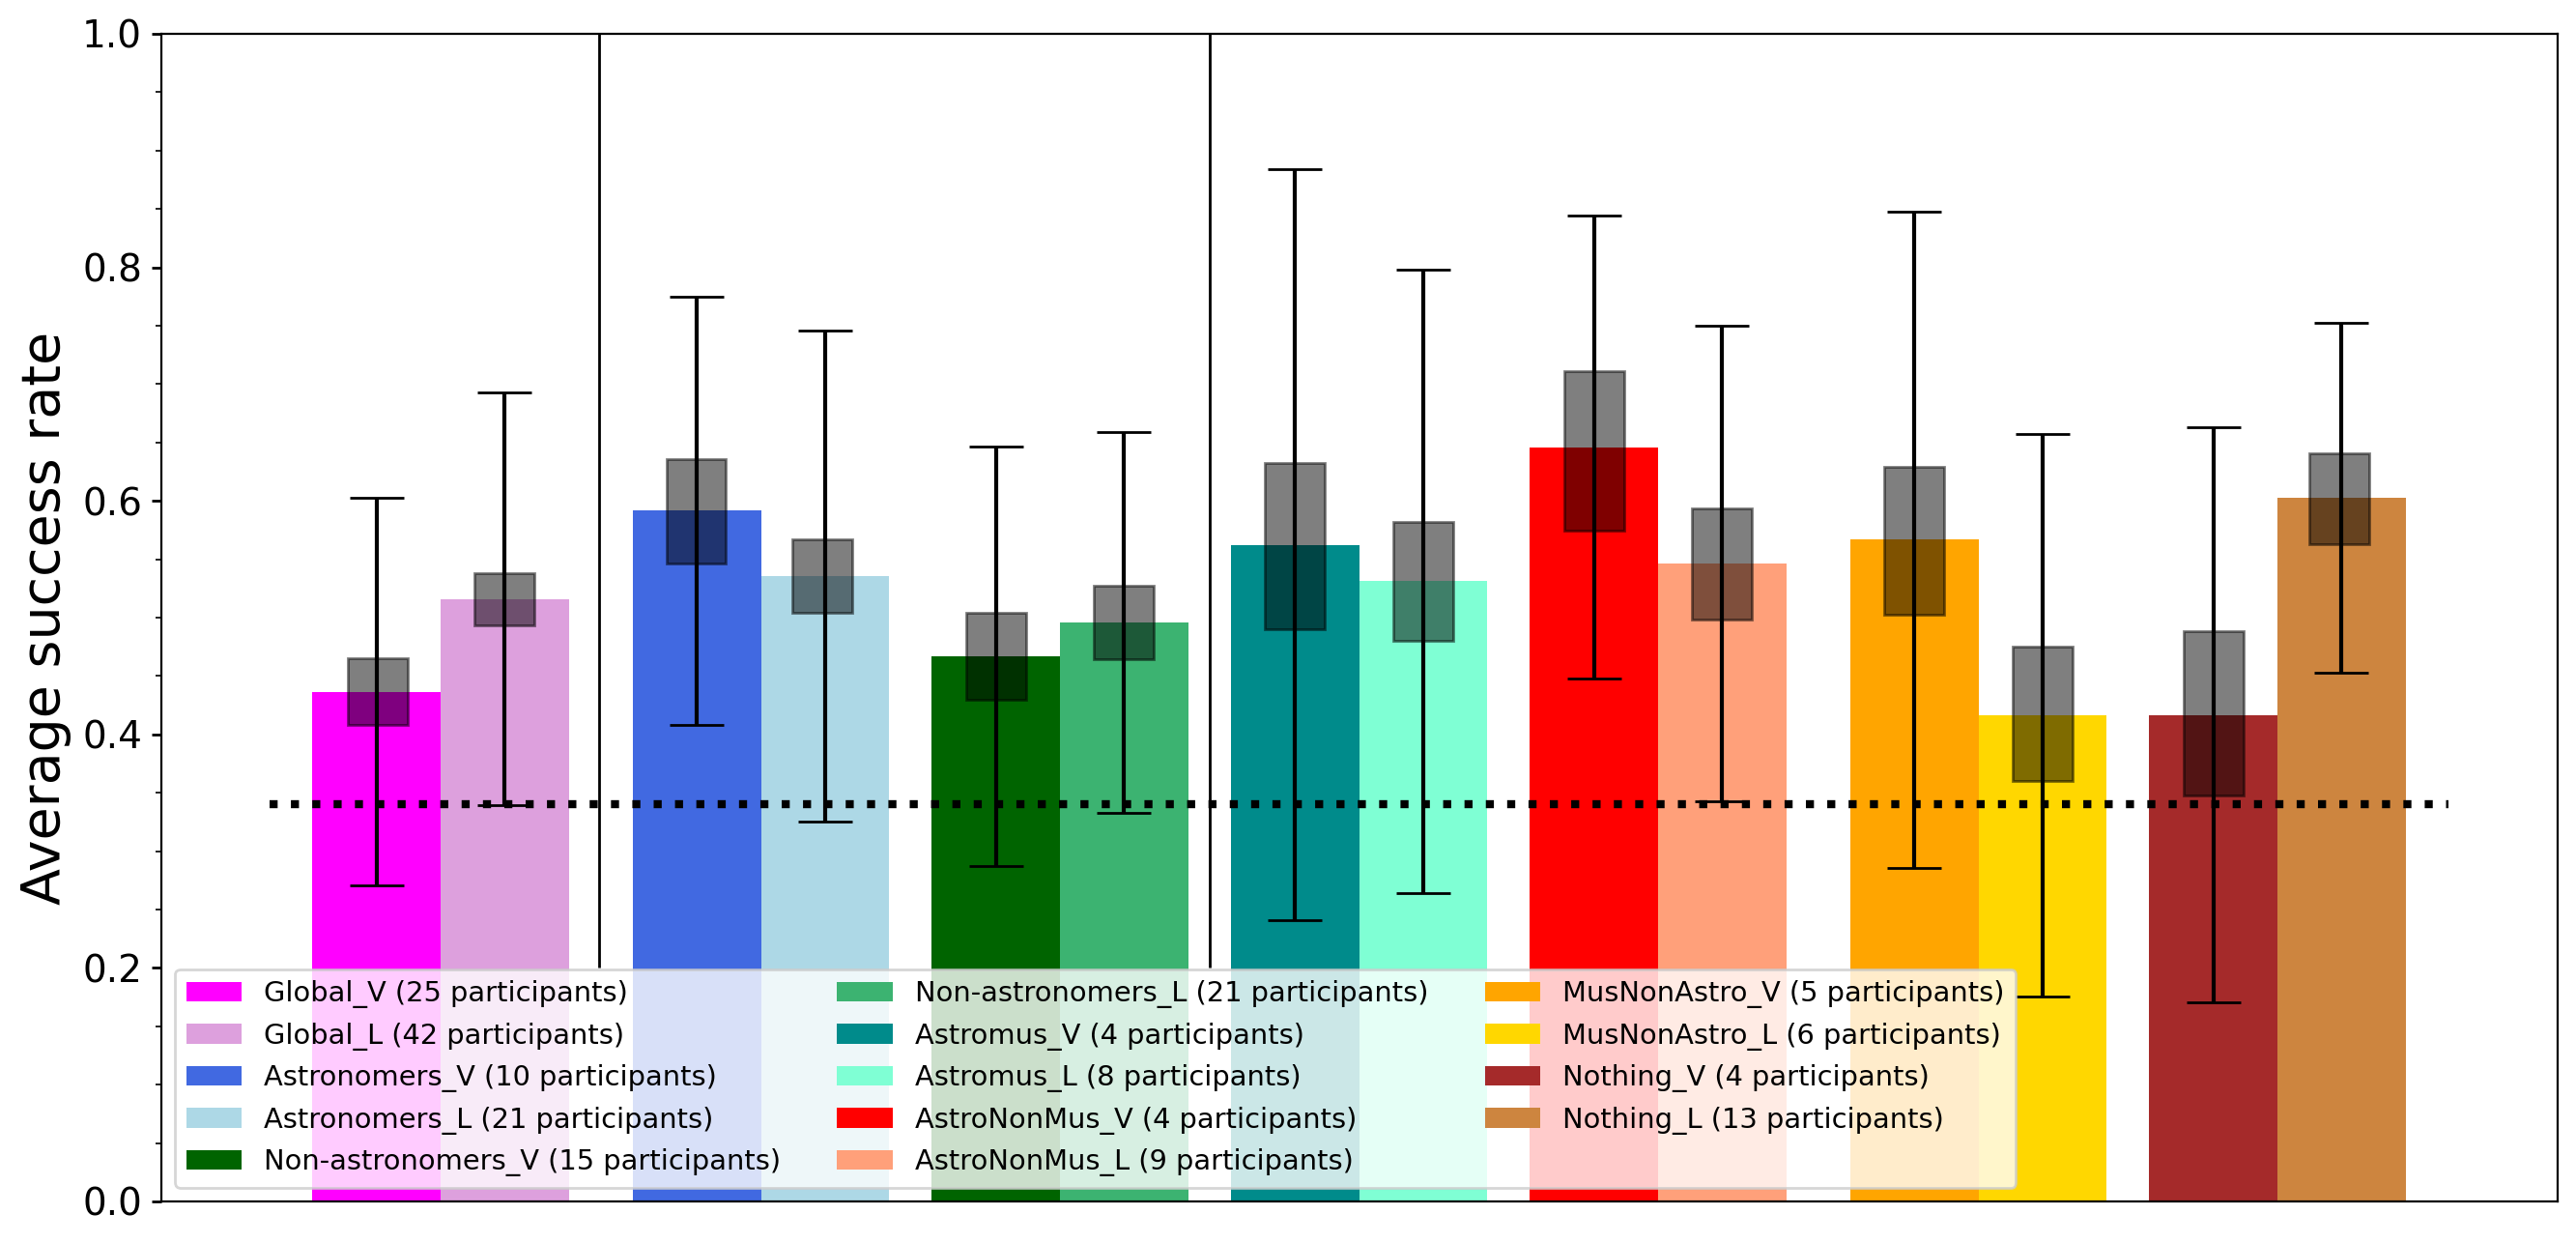

In [163]:
fig, ax = plt.subplots(figsize=(16,8),dpi=200)
x = np.arange(len(labels))
bar_width = .15
rects1 = ax.bar(0.1 - bar_width/2, means[0] , bar_width, yerr=data['std'][0], 
                label=labels[0] + " (" + str(participants[0]) + " participants)", color='fuchsia', align='center',ecolor='black',capsize=10)
rects2 = ax.bar(0.25 - bar_width/2, means[1] , bar_width, yerr=data['std'][1], 
                label=labels[1] + " (" + str(participants[1]) + " participants)", color='plum', align='center',ecolor='black',capsize=10)
rects3 = ax.bar(0.45 - bar_width/3, means[2] , bar_width, yerr=data['std'][2], 
                label=labels[2] + " (" + str(participants[2]) + " participants)",  color='royalblue', align='center',ecolor='black',capsize=10)
rects4 = ax.bar(0.60 - bar_width/3, means[3] , bar_width, yerr=data['std'][3], 
                label=labels[3] + " (" + str(participants[3]) + " participants)",  color='lightblue', align='center',ecolor='black',capsize=10)
rects5 = ax.bar(0.80 - bar_width/3, means[4] , bar_width, yerr=data['std'][4], 
                label=labels[4] + " (" + str(participants[4]) + " participants)", color='darkgreen', align='center',ecolor='black',capsize=10)
rects6 = ax.bar(0.95 - bar_width/3, means[5] , bar_width, yerr=data['std'][5], 
                label=labels[5] + " (" + str(participants[5]) + " participants)", color='mediumseagreen', align='center',ecolor='black',capsize=10)
rects7 = ax.bar(1.15 - bar_width/3, means[6] , bar_width, yerr=data['std'][6], 
                label=labels[6] + " (" + str(participants[6]) + " participants)", color='darkcyan', align='center',ecolor='black',capsize=10)
rects8 = ax.bar(1.30 - bar_width/3, means[7] , bar_width, yerr=data['std'][7], 
                label=labels[7] + " (" + str(participants[7]) + " participants)", color='aquamarine', align='center',ecolor='black',capsize=10)
rects9 = ax.bar(1.5 - bar_width/3, means[8] , bar_width, yerr=data['std'][8], 
                label=labels[8] + " (" + str(participants[8]) + " participants)", color='red', align='center',ecolor='black',capsize=10)
rects10 = ax.bar(1.65 - bar_width/3, means[9] , bar_width, yerr=data['std'][9], 
                label=labels[9] + " (" + str(participants[9]) + " participants)", color='lightsalmon', align='center',ecolor='black',capsize=10)
rects11 = ax.bar(1.9 - bar_width/2, means[10] , bar_width, yerr=data['std'][10], 
                label=labels[10] + " (" + str(participants[10]) + " participants)", color='orange', align='center',ecolor='black',capsize=10)
rects12 = ax.bar(2.05 - bar_width/2, means[11] , bar_width, yerr=data['std'][11], 
                label=labels[11] + " (" + str(participants[11]) + " participants)", color='gold', align='center',ecolor='black',capsize=10)
rects13 = ax.bar(2.25 - bar_width/2, means[12] , bar_width, yerr=data['std'][12], 
                label=labels[12] + " (" + str(participants[12]) + " participants)", color='brown', align='center',ecolor='black',capsize=10)
rects14 = ax.bar(2.40 - bar_width/2, means[13] , bar_width, yerr=data['std'][13], 
                label=labels[13] + " (" + str(participants[13]) + " participants)", color='peru', align='center',ecolor='black',capsize=10)
ax.set_ylabel('Average success rate',size=20)
ax.tick_params(which='major', width=1.0, labelsize=14)
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.vlines(x=.285, color='black', linestyle='', linewidth=2, ymin=0.2, ymax=1)
ax.vlines(x=1, color='black', linestyle='', linewidth=2, ymin=0.2, ymax=1)
ax.hlines(y=0.34, color='black', linestyle=':', linewidth=3, xmin=-0.1, xmax= 2.45)

ax.add_patch(Rectangle((-0.009, data['Jeff_low'][0]), 
                       0.07, data['Jeff_high'][0]-data['Jeff_low'][0],
                       alpha=0.5,color='black'))#,label="Jeffreys' confidence intervals"))
ax.add_patch(Rectangle((0.14, data['Jeff_low'][1]), 
                       0.07, data['Jeff_high'][1]-data['Jeff_low'][1],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((0.364, data['Jeff_low'][2]), 
                       0.07, data['Jeff_high'][2]-data['Jeff_low'][2],
                       alpha=0.5,color='black'))#,label="Jeffreys' confidence intervals"))
ax.add_patch(Rectangle((0.512, data['Jeff_low'][3]), 
                       0.07, data['Jeff_high'][3]-data['Jeff_low'][3],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((0.715, data['Jeff_low'][4]), 
                       0.07, data['Jeff_high'][4]-data['Jeff_low'][4],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((0.865, data['Jeff_low'][5]), 
                       0.07, data['Jeff_high'][5]-data['Jeff_low'][5],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((1.065, data['Jeff_low'][6]), 
                       0.07, data['Jeff_high'][6]-data['Jeff_low'][6],
                       alpha=0.5,color='black'))#,label="Jeffreys' confidence intervals"))
ax.add_patch(Rectangle((1.215, data['Jeff_low'][7]), 
                       0.07, data['Jeff_high'][7]-data['Jeff_low'][7],
                       alpha=0.5,color='black'))#,label="Jeffreys' confidence intervals"))
ax.add_patch(Rectangle((1.415, data['Jeff_low'][8]), 
                       0.07, data['Jeff_high'][8]-data['Jeff_low'][8],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((1.565, data['Jeff_low'][9]), 
                       0.07, data['Jeff_high'][9]-data['Jeff_low'][9],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((1.79, data['Jeff_low'][10]), 
                       0.07, data['Jeff_high'][10]-data['Jeff_low'][10],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((1.94, data['Jeff_low'][11]), 
                       0.07, data['Jeff_high'][11]-data['Jeff_low'][11],
                       alpha=0.5,color='black'))#,label="Jeffreys' confidence intervals"))
ax.add_patch(Rectangle((2.14, data['Jeff_low'][12]), 
                       0.07, data['Jeff_high'][12]-data['Jeff_low'][12],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((2.287, data['Jeff_low'][13]), 
                       0.07, data['Jeff_high'][13]-data['Jeff_low'][13],
                       alpha=0.5,color='black'))

plt.ylim(top=1)
ax.set_xticks([])
ax.set_xticklabels([])
ax.legend(fontsize=10.4, ncol= 3, loc='lower left')
plt.savefig('ViewCube-VideoVsLive_OK.png')
plt.show()